# A-gs model and implementation (simulation CO2 and H2O flux)

## Initialize data and model

### Setup and fetch data

In [1]:
# Settings
Username   = 'Beheerder'
years      = range(2001,2021)    #(1997,2021) # Set years to download

In [2]:
import os
datapath = os.path.join('../')
#print('datapath is set to %s'%datapath)

# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install plotly 
# !pip install cufflinks
#!pip install colorspacious
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
#import cufflinks as cf
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from matplotlib import cm
#from colorspacious import cspace_converter
import scipy.stats as stats
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

from datetime import datetime, timedelta
import sys
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
from Loobos_Toolbox import dateparse, dateparse_Gapfilled, Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile
from Ags_model import runAgs, calc_LE , calc_LE2

In [3]:
import matplotlib.dates as mdates

In [4]:
#these next two lines are to prevent re-loading the data. If you want to re-load data, instead comment them out
if not 'progress' in globals(): progress = list()
if not 'dataloaded' in progress:
  # Read files
    df_EC           = Read_LoobosEddFinal    (years,datapath)
    #df_Stor         = Read_LooStor           (years,datapath)
    df_Comb         = Read_LoodatGapfill     (years,datapath)
    #df_NEE          = Read_Loobos_halfhourly (years,datapath)
    df_meteo        = Read_Loobos_meteo      (years,datapath)
    df_soil         = Read_Loobos_soil       (years,datapath) 
    df_profile      = Read_Loobos_profile    (years,datapath)
    progress.append('dataloaded')

Loading 2001
Loading 2002
Loading 2003
Loading 2004
Loading 2005
Loading 2006
Loading 2007
Loading 2008
Loading 2009
Loading 2010
Loading 2011
Loading 2012
Loading 2013
Loading 2014
Loading 2015
Loading 2016
Loading 2017
Loading 2018
Loading 2019
Loading 2020
df_EC loaded. Columns in this dataframe:
Index(['Doy', 'Dtime', 'Flx_Tsonic', 'Flx_Lo-H2O', 'Flx_Lo-CO2', 'Qf_Tsonic',
       'Qf_Lo-H2O', 'Qf_Lo-CO2', 'Mea_Windsp', 'Mea_Tsonic', 'Mea_Lo-H2O',
       'Mea_Lo-CO2', 'U-star', 'Z-over-L', 'Wind-Dir', '80PercFlux'],
      dtype='object')
Loading 2001
Loading 2002
Loading 2003
Loading 2004
Loading 2005
Loading 2006
Loading 2007
Loading 2008
Loading 2009
Loading 2010
Loading 2011
Loading 2012
Loading 2013
Loading 2014
Loading 2015
Loading 2016
Loading 2017
Loading 2018
Loading 2019
Loading 2020
df_Comb loaded. Columns in this dataframe:
Index(['Year', 'DoY', 'Hour', 'qcNEE', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil',
       'rH', 'Ustar', 'VPD', 'NEE_orig', 'NEE_f', 'NEE_fqc', 'NEE_fall'

C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007
Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009
Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2014
Loading 2015


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2016
Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2018
Loading 2019


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_meteo loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'S(i)', 'S(o)', 'L(i)', 'L(o)', 'G1', 'PAR',
       'H2OLic', 'CO2Lic', '-q', 'Te(vaisal)', 'Te-L(i)', 'Te-L(o)', '-u(z)',
       '-u(dir)', 'Min u(z)', 'WSC therm', 'SD S(i)', 'SD S(o)', 'SD L(i)',
       'SD L(o)', 'SD G1', 'SD PAR', 'SD H2OLic', 'SD CO2Lic', 'SD q',
       'SD Te(vaisal)', 'Battery V', 'CR10 temp', 'P(mast)00', 'P(guter)00',
       'P(mast)05', 'P(guter)05', 'P(mast)10', 'P(guter)10', 'P(mast)15',
       'P(guter)15', 'P(mast)20', 'P(guter)20', 'P(mast)25', 'P(guter)25',
       'P(mast)', 'P(guter)', 'P(field)', 'L(i)corr', 'L(o)corr', 'R(net)',
       'P(guter)corr', 'Pcorr', 'PARrefl', 'PARdiff', 'H2Olic', 'CO2lic',
       'Vbatt', 'CR10temp', 'SD u(z)', '#NAME?', '#NAME?.1', '#NAME?.2'],
      dtype='object')
Loading ../\Soilmoist\Final\Loosoifinal01.csv...
Loading ../\Soilmoist\Final\Loosoifinal02.csv...
Loading ../\Soilmoist\Final\Loosoifinal03.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future vers

Loading ../\Soilmoist\Final\Loosoifinal04.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal05.csv...
Loading ../\Soilmoist\Final\Loosoifinal06.csv...
Loading ../\Soilmoist\Final\Loosoifinal07.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future vers

Loading ../\Soilmoist\Final\Loosoifinal08.csv...
Loading ../\Soilmoist\Final\Loosoifinal09.csv...
Loading ../\Soilmoist\Final\Loosoifinal10.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future vers

Loading ../\Soilmoist\Final\Loosoifinal11.csv...
Loading ../\Soilmoist\Final\Loosoifinal12.csv...
Loading ../\Soilmoist\Final\Loosoifinal13.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future vers

Loading ../\Soilmoist\Final\Loosoifinal14.csv...
Loading ../\Soilmoist\Final\Loosoifinal15.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal16.csv...
Loading ../\Soilmoist\Final\Loosoifinal17.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal18.csv...
Loading ../\Soilmoist\Final\Loosoifinal19.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal20.csv...
df_soil loaded. Columns in this dataframe:
Index(['Time', 'Daynumber', 'Year', 'EC200', 'EC201', 'EC202', 'EC203',
       'EC204', 'EC205', 'EC206', 'EC207', 'EC208', 'EC209', 'Temp200',
       'Temp201', 'Temp202', 'Temp203', 'Temp204', 'Temp205', 'Temp206',
       'Temp207', 'Temp208', 'Temp209', 'Eps200co', 'Eps201co', 'Eps202co',
       'Eps203co', 'Eps204co', 'Eps205co', 'Eps206co', 'Eps207co', 'Eps208co',
       'Eps209co', 'SM-Lit', 'SM-003', 'SM-020', 'SM-050', 'SM-100', 'ST-Lit',
       'ST-003', 'ST-020', 'ST-050', 'ST-100', 'T-bole'],
      dtype='object')
Loading 2001
Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003
Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007
Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009
Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013
Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015
Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017
Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_profile loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'Vtemptop', 'Vtempmid', 'Vtempbot', 'VaiVPtop',
       'VaiVPmid', 'Pressure', 'VecWStop', 'VecWSmid', 'VecWSbot', 'H2Olevel1',
       'H2Olevel2', 'H2Olevel3', 'H2Olevel4', 'H2Olevel5', 'CO2level1',
       'CO2level2', 'CO2level3', 'CO2level4', 'CO2level5', 'H2Ocal', 'CO2cal'],
      dtype='object')


In [5]:
#Old filter, no longer used
# Make filter for GPP orginial data and not gapfilled
#General filters
#I = ((df_Comb['GPP_fqc']==0)&(df_meteo['PAR']>0))
# Filter for CO2 data
#CO2_filt = (df_profile['CO2level1'] > 300)
# Filter for L(o)corr data
#Locorr_filt = (df_meteo['L(o)corr']>0) 
# Filter for VPD data
#VPD_filt = (df_Comb['VPD']>=0)
# Filter for U-star
#Ustar_filt = (df_EC['U-star']>=0)
# Combine all filters
#filter = I & CO2_filt & Locorr_filt & VPD_filt & Ustar_filt
#Column 'CO2' is input from df_profile
#df_profile_filter = df_profile[filter]
#Column 'L(o)corr' and 'PAR' are inputs from df_meteo
#df_meteo_filter = df_meteo[filter]
#Columns 'VPD' and 'Tair' are inputs from df_Comb
#df_Comb_filter = df_Comb[filter]
# Columns 'Mea_Windsp' and 'U-star' are inputs from df_EC
#df_EC_filter = df_EC[filter]

In [6]:
# Make filter for GPP orginial data and not gapfilled
#General filters
I = ((df_Comb['GPP_fqc']==0)&(df_meteo['PAR']>0))
#t = df_profile.index                                          
#time = (t < np.datetime64('2013-05-08')) | (t > np.datetime64('2013-06-01'))

df_profile_filter = df_profile.copy()
df_meteo_filter   = df_meteo.copy()
df_Comb_filter    = df_Comb.copy()
df_EC_filter      = df_EC.copy()

# Filter for gpp original data and not gapfilled
#GPP_fcq_filt = ~(df_Comb['GPP_fqc']==0)
#df_Comb_filter.loc[GPP_fcq_filt] #this one removes all rows that match not just GPP_fqc

# Filter for CO2 data
CO2_filt = ~(df_profile['CO2level1'] > 300)
df_profile_filter.loc[CO2_filt,['CO2level1']] = np.nan

# Filter for PAR data
PAR_filt = ~(df_meteo['PAR'] >= 0)
df_meteo_filter.loc[PAR_filt,['PAR']] = np.nan

# Filter for L(o)corr data
Locorr_filt = ~((df_meteo['L(o)corr']>0) & (df_meteo['L(o)corr']<500)) 
df_meteo_filter.loc[Locorr_filt,'L(o)corr'] = np.nan

# Filter for L(o) data
Lo_filt = ~((df_meteo['L(o)']>0) & (df_meteo['L(o)']<40))
df_meteo_filter.loc[Lo_filt,'L(o)'] = np.nan

# Filter for Te-Lo data
TeLo_filt = ~(df_meteo['Te-L(o)']<40)
df_meteo_filter.loc[TeLo_filt,'Te-L(o)'] = np.nan

# Filter for VPD data
VPD_filt = ~(df_Comb['VPD']>=0)
df_Comb_filter.loc[VPD_filt,['VPD']] = np.nan

# Filter for U-star
Ustar_filt = ~(df_EC['U-star']>=0)
df_EC_filter.loc[Ustar_filt,['U-star']] = np.nan

### Import KNMI rain data

In [7]:
#import KNMI rain data here. RD is daily sum rain.
df_rain = pd.read_csv('./knmi_rain_daily.csv')
df_rain.index = pd.to_datetime(df_rain['date'])
df_rain.drop('date',axis=1,inplace=True)
#df_rain

In [8]:
df_rain.index[-1].replace(hour=23, minute=30)

Timestamp('2020-12-31 23:30:00')

In [9]:
#creating 30min compatible dataframe
#end=df_rain.index[-1].replace(hour=23, minute=30) 
df_rain_30m = df_rain.resample('30min').ffill() #this dataframe only exists to create a filter selection for row labels for which rain is zero 
df_rain_30m.rename(columns={'RD':'dailysum_rain'},inplace=True) #make sure you don't further use dailysum, as ffill was used, so renaming for clarity
#I cant figure out how to not make resample run to the end of the last day instead of just getting stuck at midnight, so create last little bit:
tail = pd.DataFrame(np.nan,
                    index=pd.date_range(start="2020-12-31 00:30:00",end="2020-12-31 23:30:00",freq="30min"),
                    columns=['dailysum_rain','days_since_rain'])
tail['dailysum_rain'] = 1.3
tail['days_since_rain'] = 0.0
#attach the tail to the end of the df
df_rain_30m = pd.concat([df_rain_30m,tail],axis=0)
#df_rain_30m

### Run A-gs model

In [10]:
# Run A-gs model

an_final,an_umol,rs, ra = runAgs(df_profile_filter,df_Comb_filter,df_meteo_filter,df_EC_filter,fstr=1.0)

## Calcuate ET

### Assemble dataframe 'df_ET' that will hold output and fill with inputs

In [11]:
def init_ETframe(rs_series):
    df_ET = pd.concat([df_meteo['L(o)corr'],df_profile['Pressure'],df_Comb['VPD'],df_Comb['rH'],df_meteo['P(mast)']],axis=1,sort=False)
    #convert Pressure from hPa to kPa 
    df_ET['p_kPa']=df_ET['Pressure']/10
    df_ET['VPD_adj']=df_ET['VPD'].loc[df_ET['VPD']>0] #some outlier values for VPD are negative, remove from dataset
    df_ET['VPD_adj']=df_ET['VPD_adj']/10  # VPD from df_Comb is in hPa, I need kPa, so hPa/10 = kPa
    df_ET['rs']=rs_series.to_frame(name="rs")
    df_ET['ra']=ra.to_frame(name="ra")
    return df_ET

In [12]:
df_ET=init_ETframe(rs)

In [13]:
df_ET=calc_LE2(df_ET)

## get observed LE values

In [14]:
df_LE_obs=df_Comb_filter[['LE']].copy()
LE_filt = ~(df_LE_obs['LE'] >= 0)
df_LE_obs.loc[LE_filt,['LE']] = np.nan
#df_ET_obs['LE'].plot()

## fstr analysis

### step 1 assemble dataframe and chop up according to each week

### calculate fstr

In [34]:
#df_LE_obs = pd.read_csv('./LE_obs.csv')
#df_LE_obs.index = pd.to_datetime(df_LE_obs['datetime'])
#df_LE_obs.drop('datetime',axis=1,inplace=True)

df_LE_sim = pd.DataFrame()
df_LE_sim['ET'] = df_ET['ET_VPD']

df_fstr = pd.DataFrame()
df_fstr['LE'] = df_LE_obs['LE']
df_fstr=df_fstr.merge(df_LE_sim['ET'], how='inner',left_index=True, right_index=True)

df_fstr_3h = df_fstr.resample('3H').mean()

df_fstr_3h.loc[:,'LE/ET'] = df_fstr_3h['LE']/df_fstr_3h['ET']

#df_fstr

### filter out rainy days

In [36]:
#check same trim-size #obsolete
#print(df_fstr.index[0],df_fstr.index[0])
#print(df_rain_30m.index[0],df_rain_30m.index[-1])

2001-01-01 00:00:00 2001-01-01 00:00:00
2001-01-01 00:00:00 2020-12-31 23:30:00


In [17]:
#st=df_fstr.index[0] #df_rain_30m needs to be trimmed to same size as df_fstr
#ed=df_fstr.index[-1]
#df_fstr_3h_filt = df_fstr_3h_filt.loc[df_rain_3h.loc[st:ed,'dailysum_rain']==0.0]

In [37]:
df_rain_3h = df_rain_30m.resample('3H').sum()
df_rain_3h.loc[:,'days_since_rain'] = df_rain_30m['days_since_rain'].resample('3H').ffill()
print(df_rain_3h.index[0],df_rain_3h.index[-1])
print(df_fstr_3h.index[0],df_fstr_3h.index[-1])

2001-01-01 00:00:00 2020-12-31 21:00:00
2001-01-01 00:00:00 2020-12-31 21:00:00


In [17]:
#st=df_fstr.index[0] #df_rain_30m needs to be trimmed to same size as df_fstr
#ed=df_fstr.index[-1]
df_fstr_3h_filt = df_fstr_3h.loc[df_rain_3h.loc[st:ed,'dailysum_rain']==0.0]

In [41]:
df_fstr_filt_1d = df_fstr_filt_3h.resample('1D').mean()
df_fstr_filt_7d = df_fstr_filt_3h.resample('7D').mean()

In [19]:
df_fstr_filt.loc[:,'LE/ET'] = df_fstr_filt['LE']/df_fstr_filt['ET']
df_fstr_filt_3h.loc[:,'LE/ET'] = df_fstr_filt_3h['LE']/df_fstr_filt_3h['ET']
df_fstr_filt_1d.loc[:,'LE/ET'] = df_fstr_filt_1d['LE']/df_fstr_filt_1d['ET']
df_fstr_filt_7d.loc[:,'LE/ET'] = df_fstr_filt_7d['LE']/df_fstr_filt_7d['ET']

C:\Users\feder\AppData\Local\Temp\ipykernel_15944\3417992991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fstr_filt.loc[:,'LE/ET'] = df_fstr_filt['LE']/df_fstr_filt['ET']


### save fstr to file 

In [67]:
df_fstr_filt.to_csv('./fstrOutput/fstr_30m_norainydays.csv')
df_fstr_filt_3h.to_csv('./fstrOutput/fstr_3H_norainydays.csv')
df_fstr_filt_1d.to_csv('./fstrOutput/fstr_1D_norainydays.csv')
df_fstr_filt_7d.to_csv('./fstrOutput/fstr_7D_norainydays.csv')

# manual check with figures

In [20]:
#df_fstr.loc[df_rain_30m.loc[st:ed,'days_since_rain']>=7.0,['LE/ET']].plot()

<Axes: >

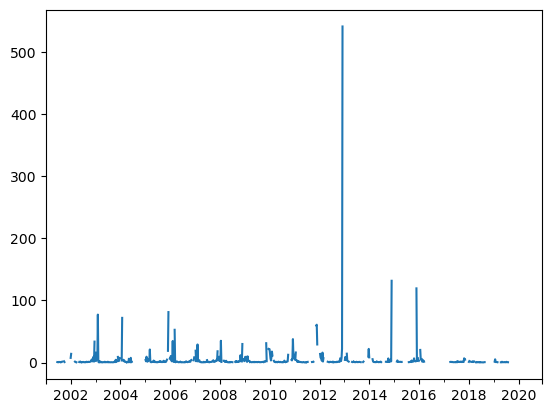

In [21]:
df_fstr_filt_7d['LE/ET'].plot()

### Old way

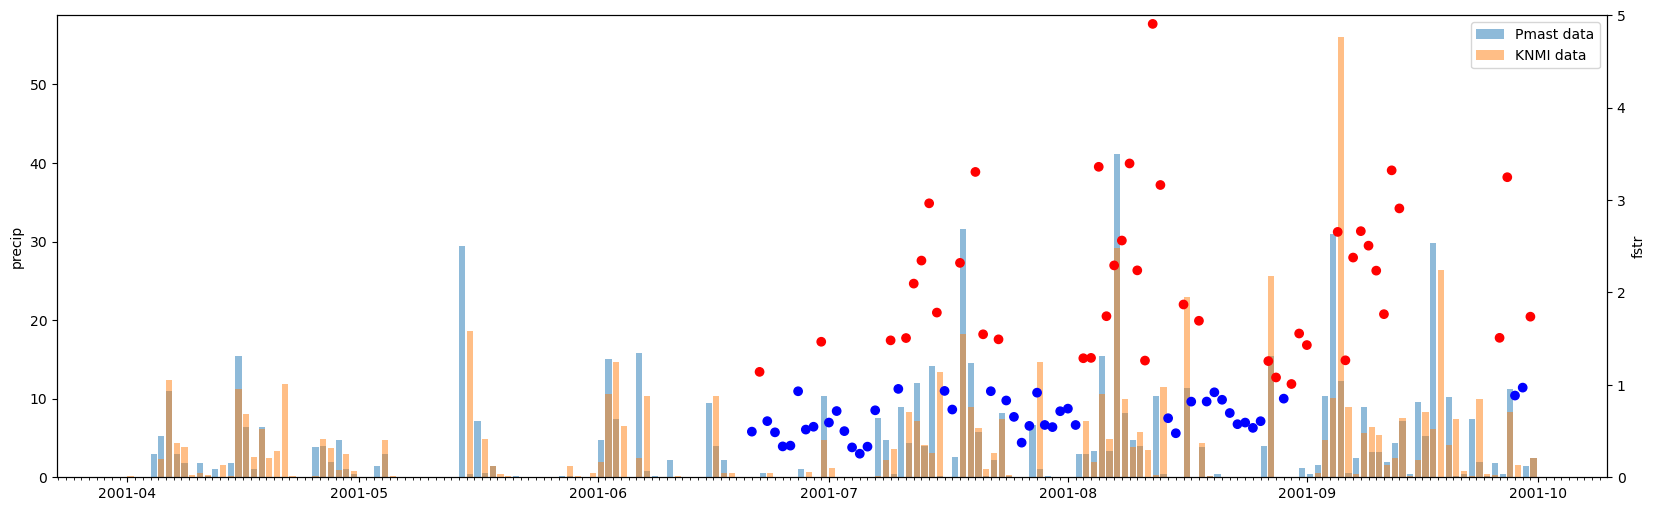

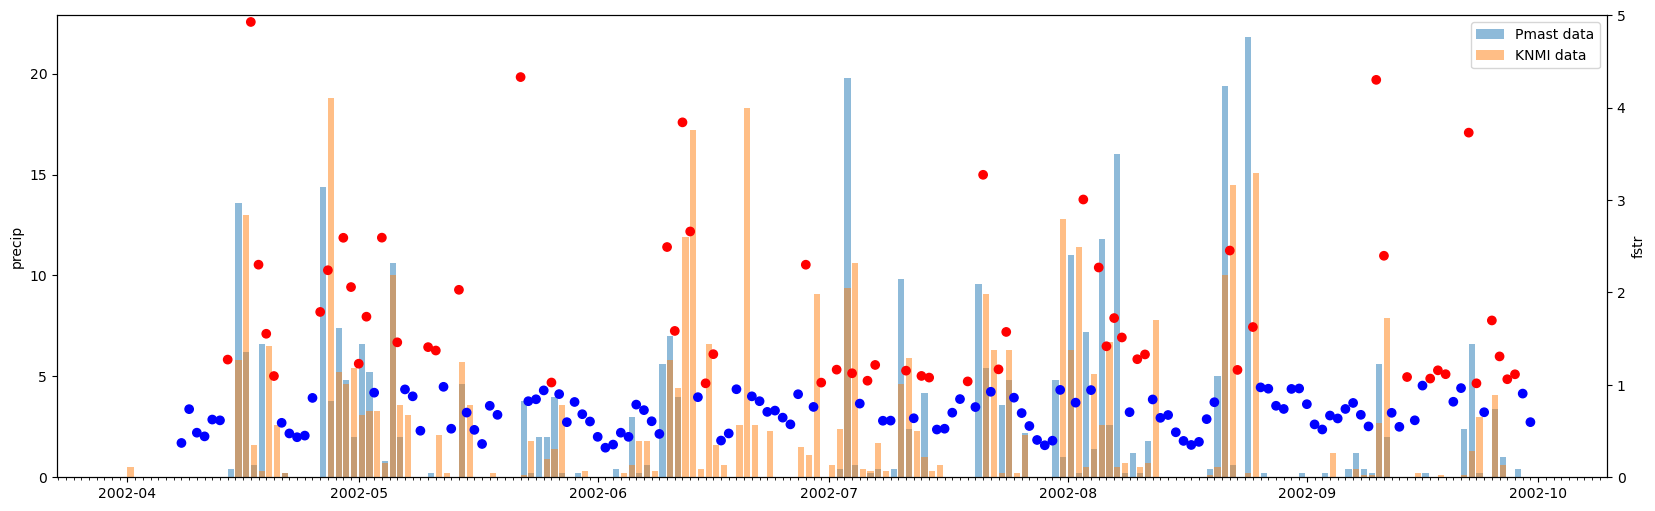

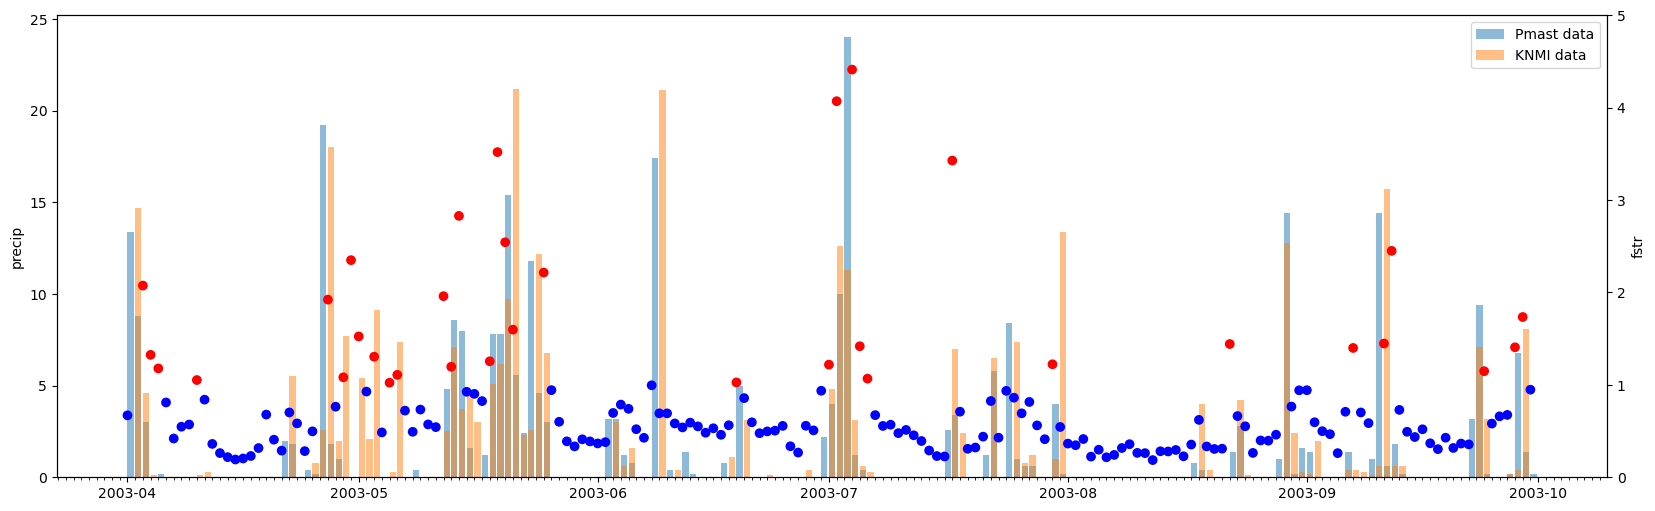

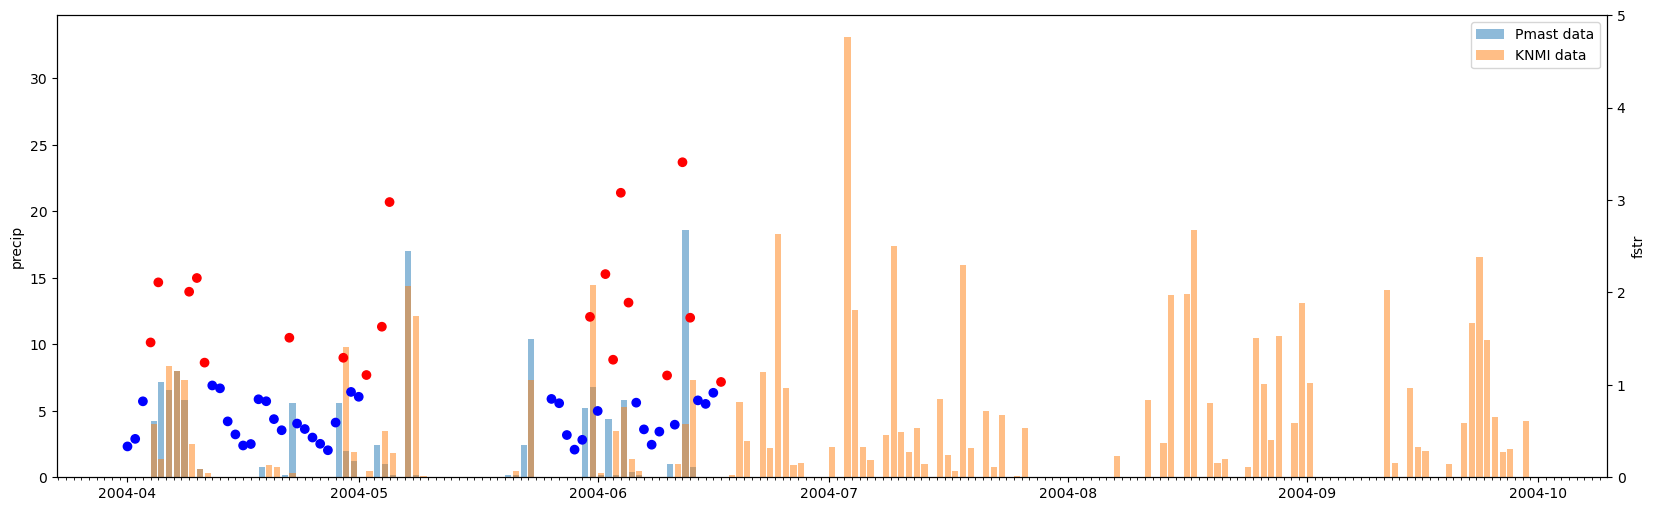

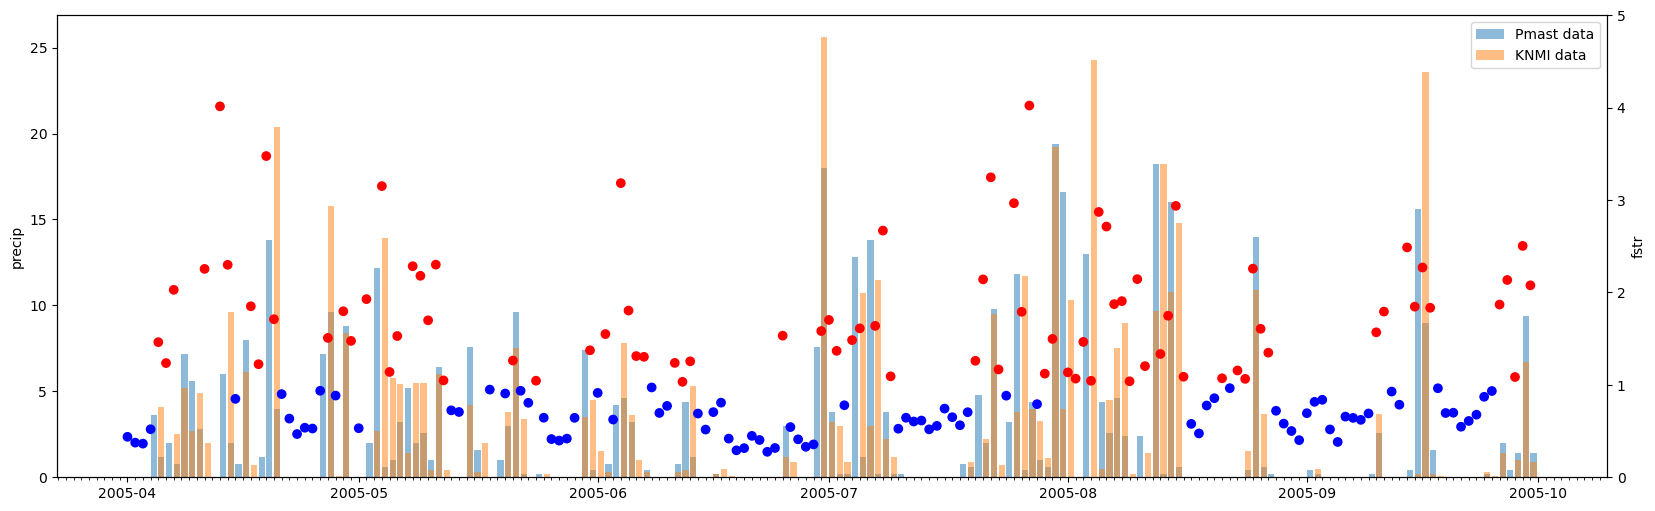

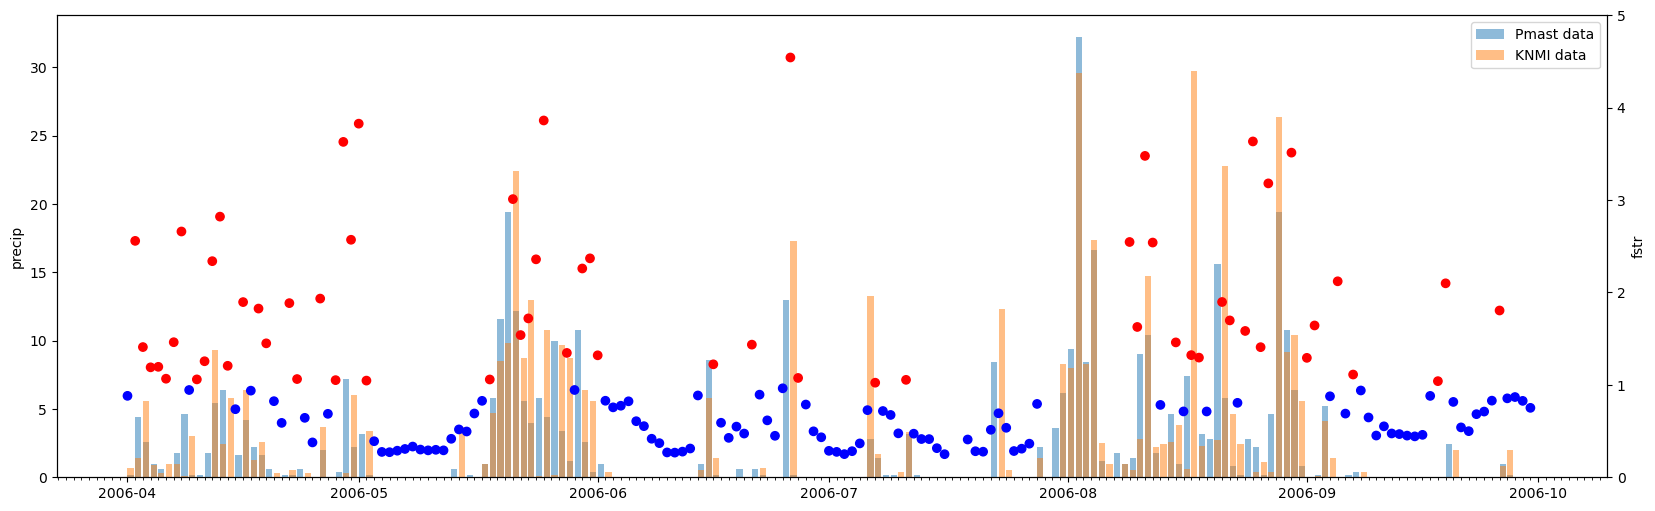

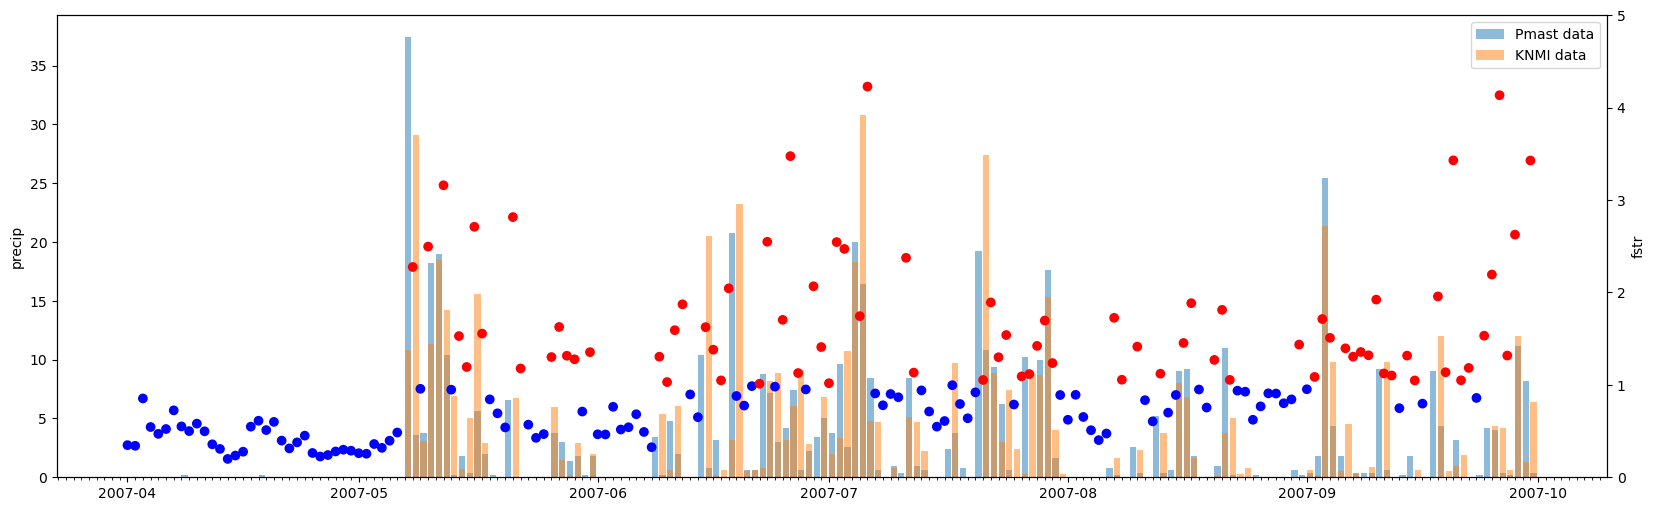

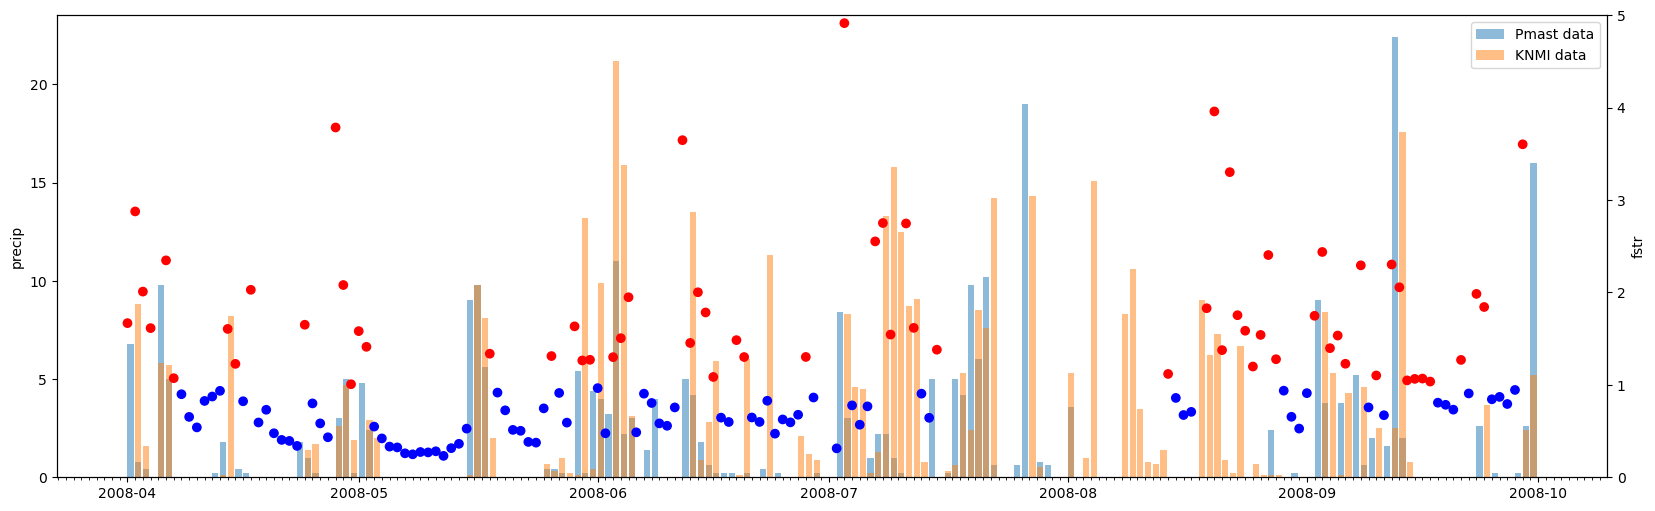

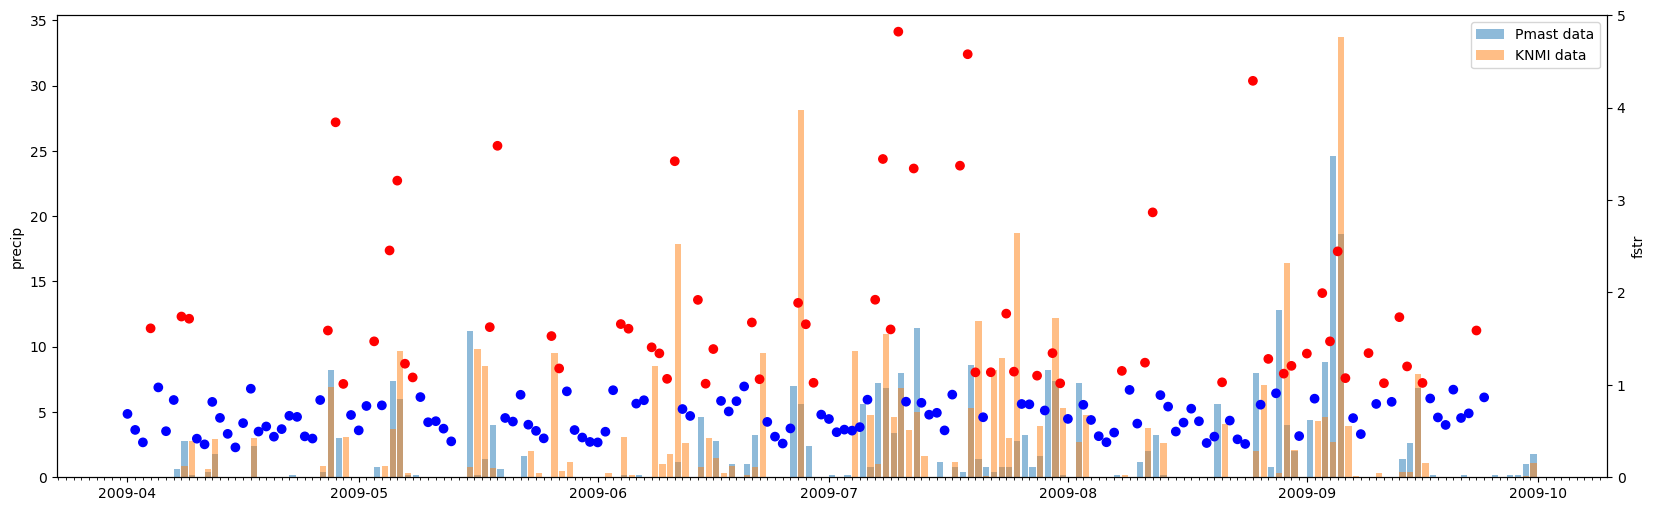

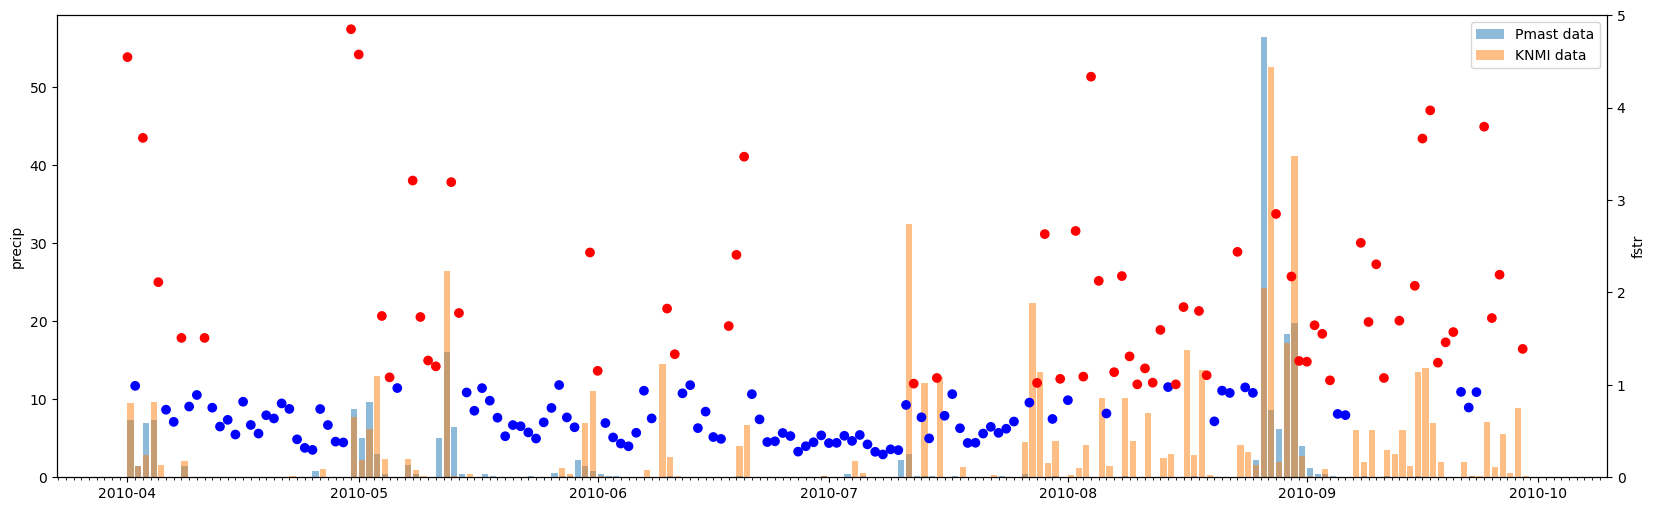

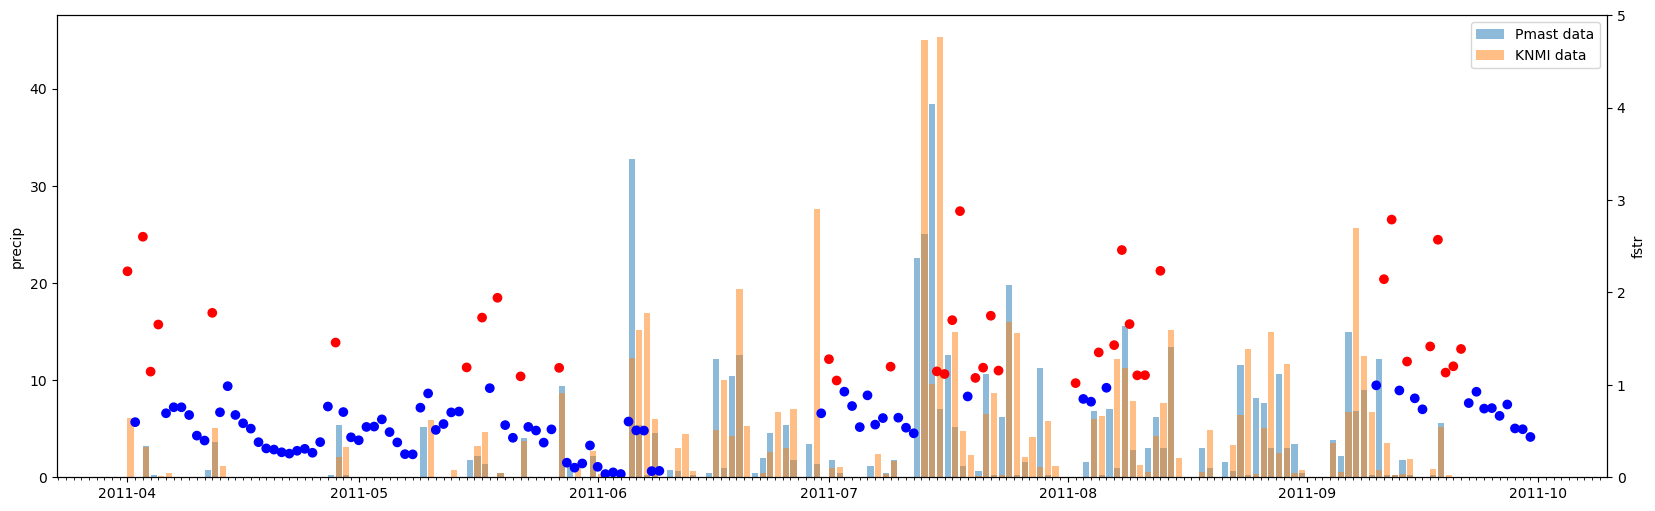

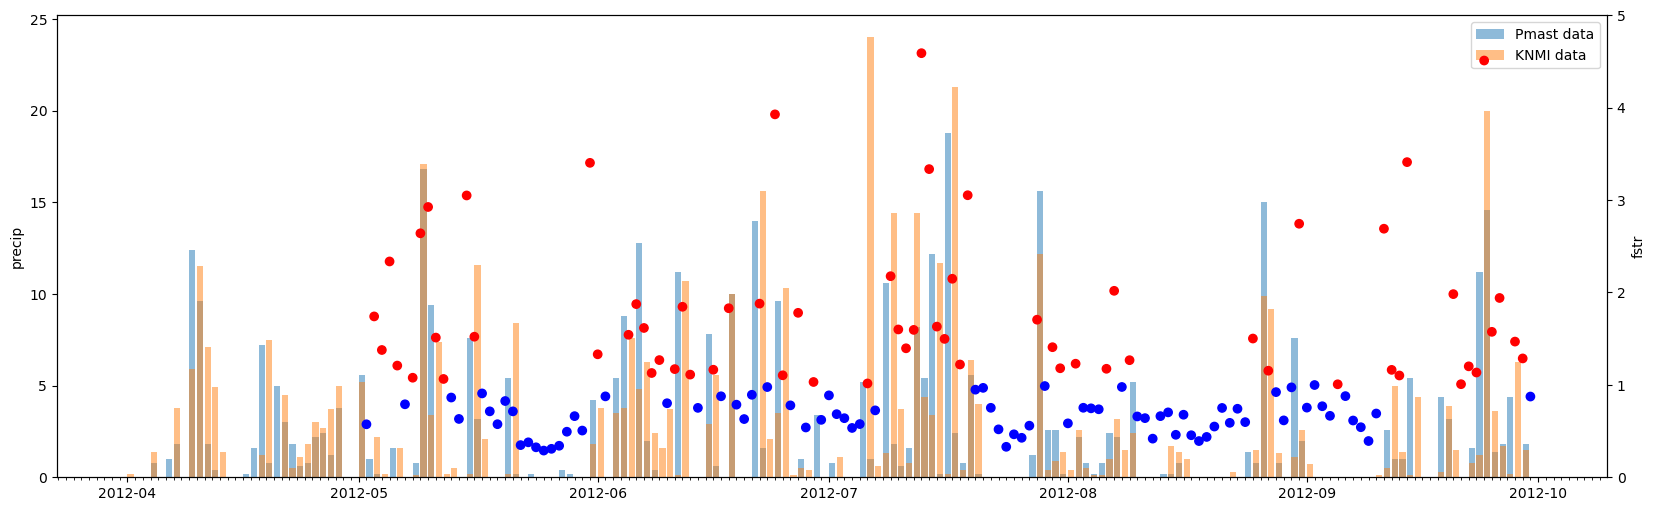

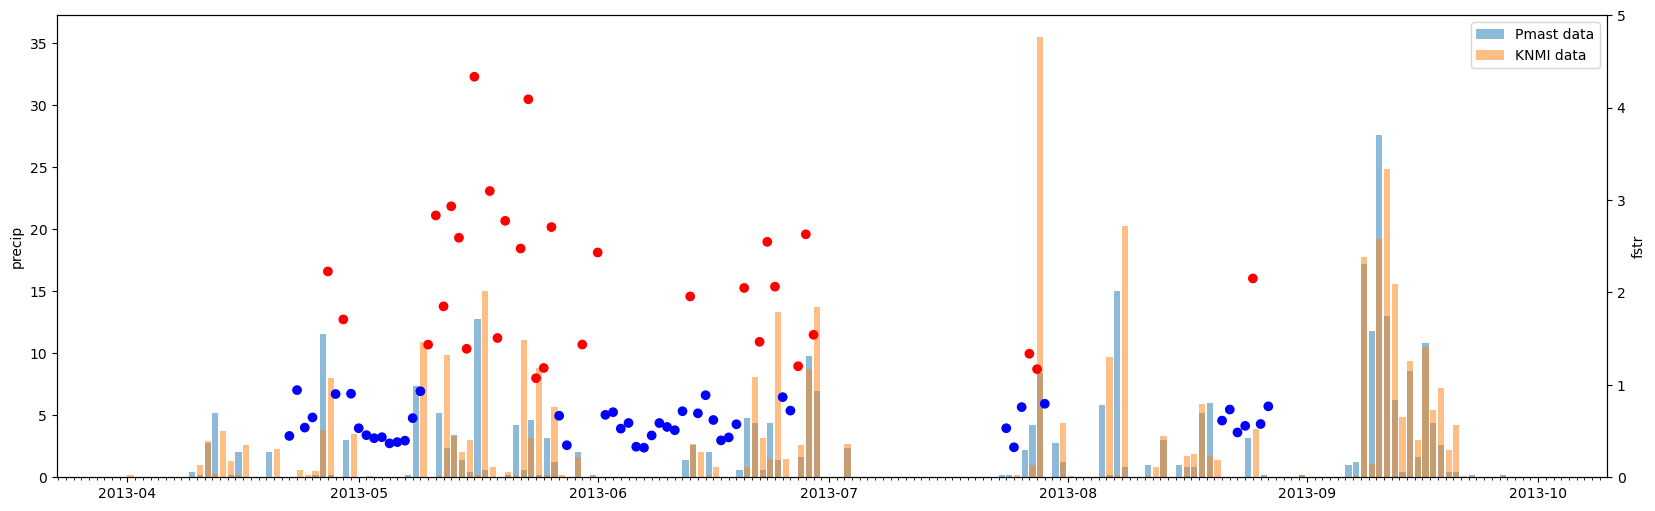

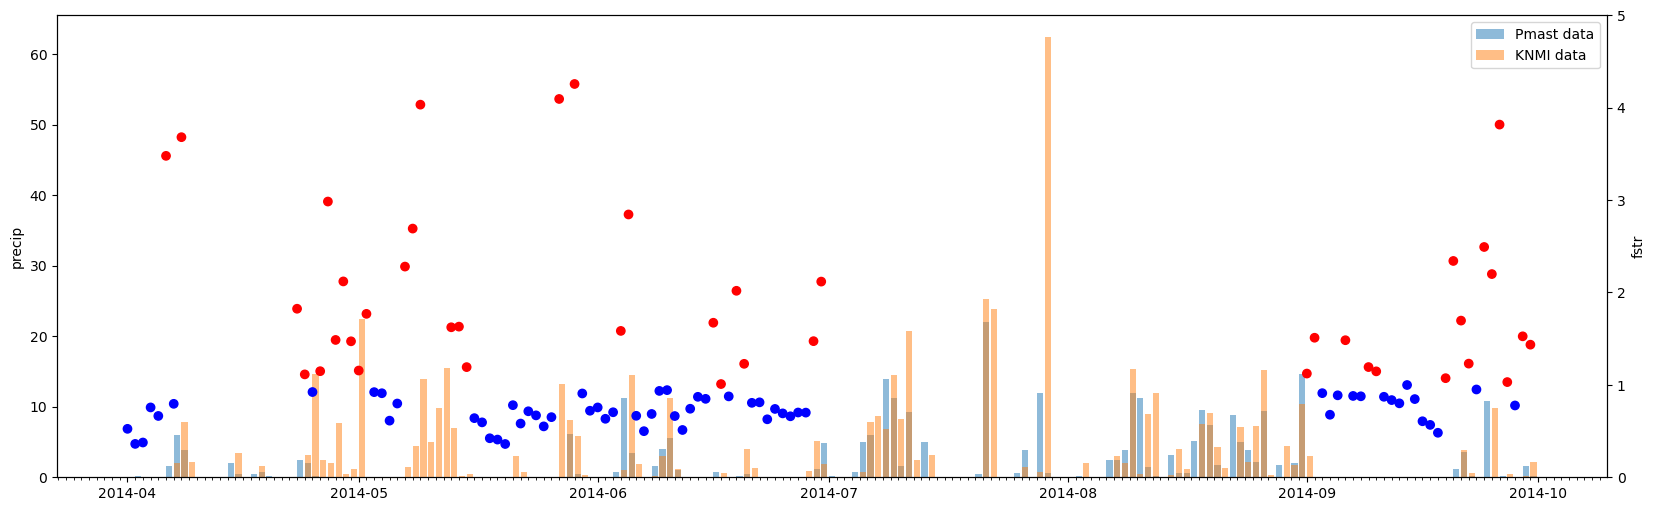

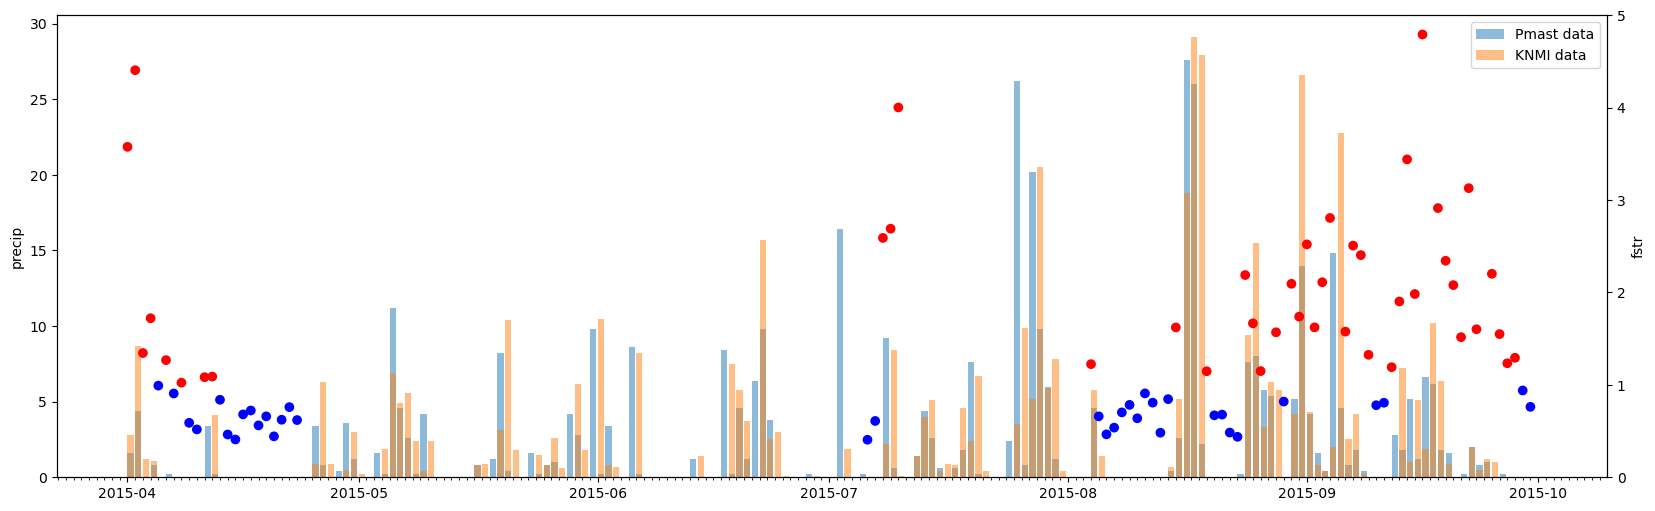

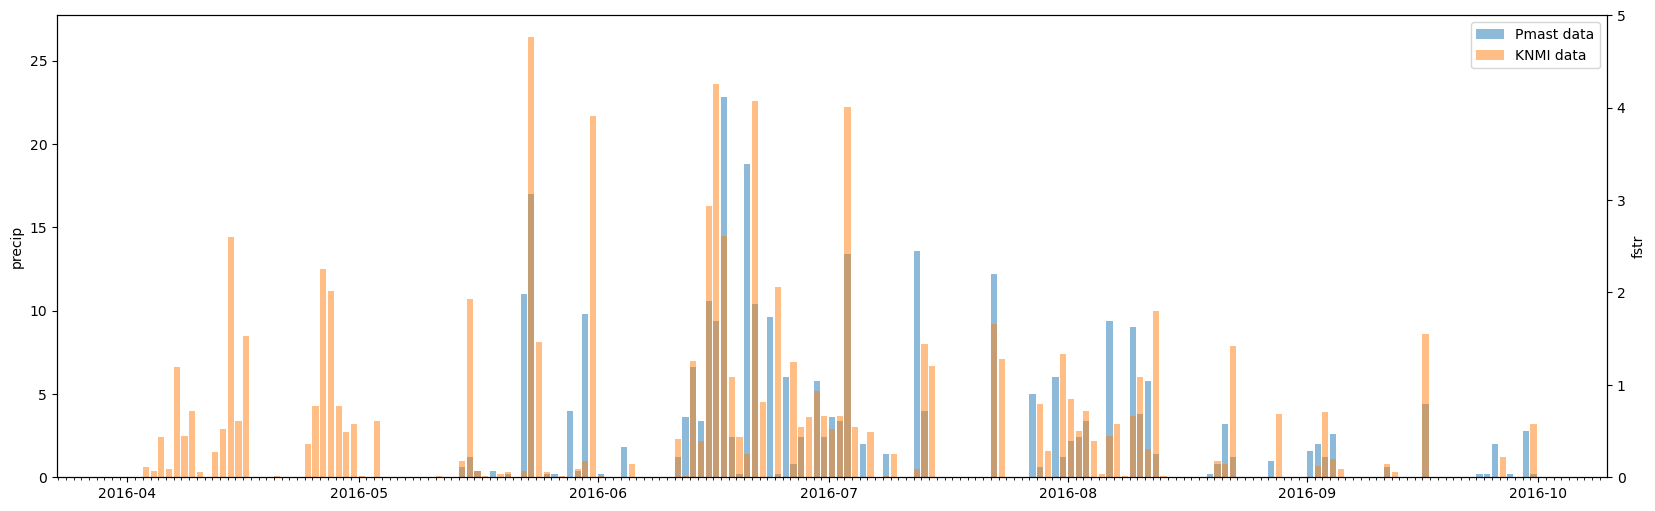

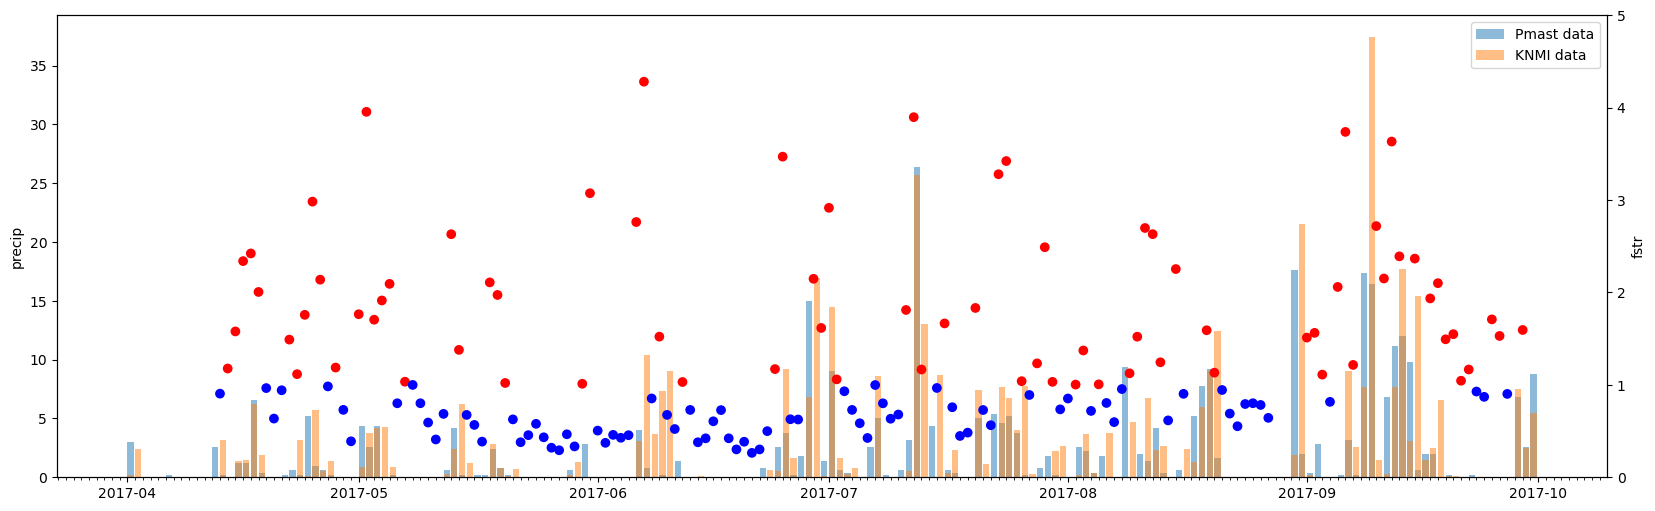

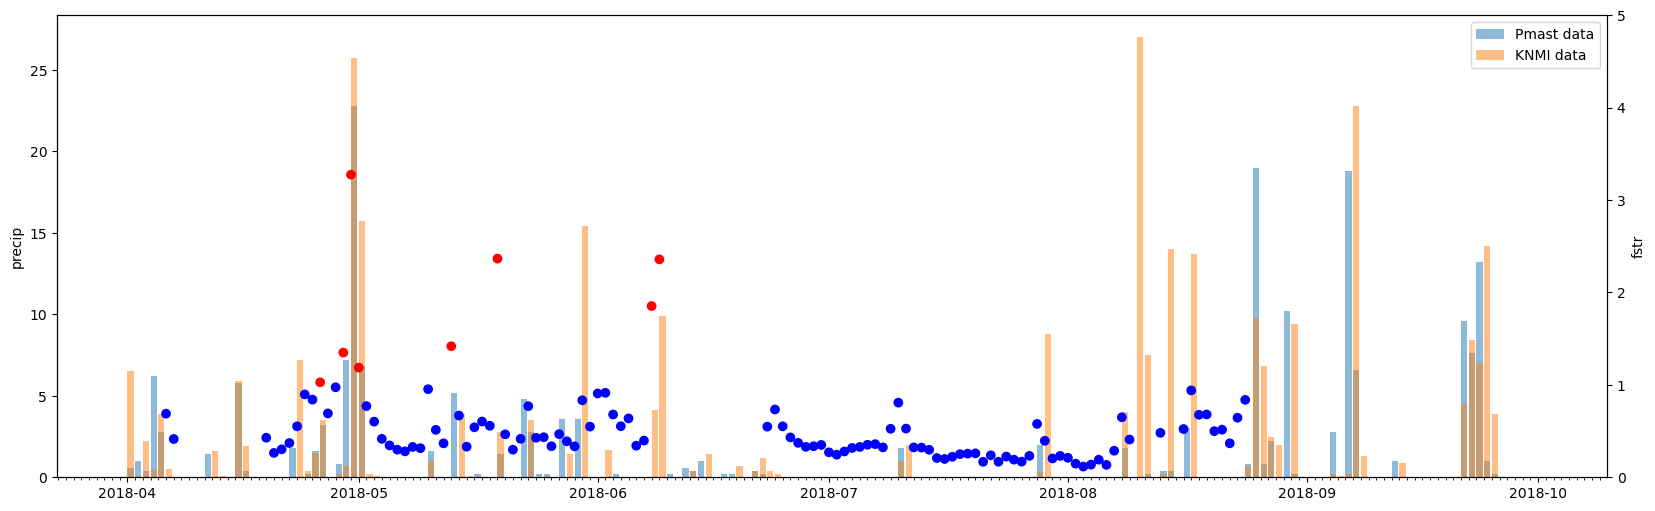

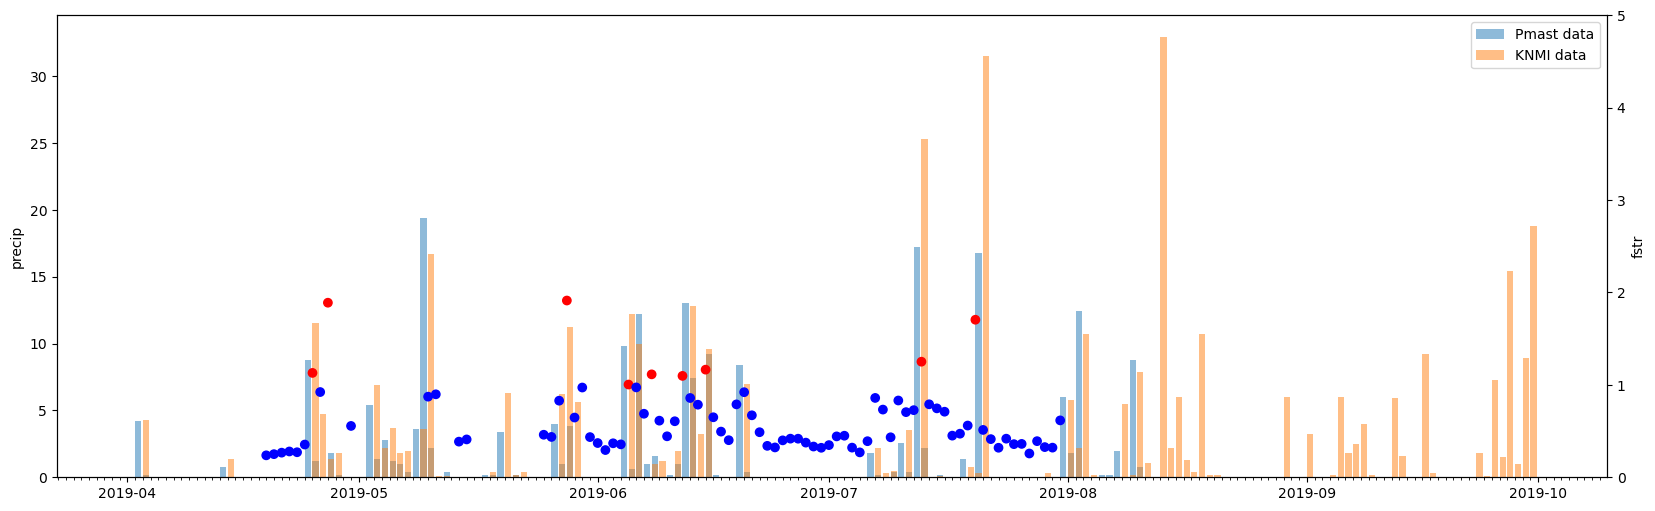

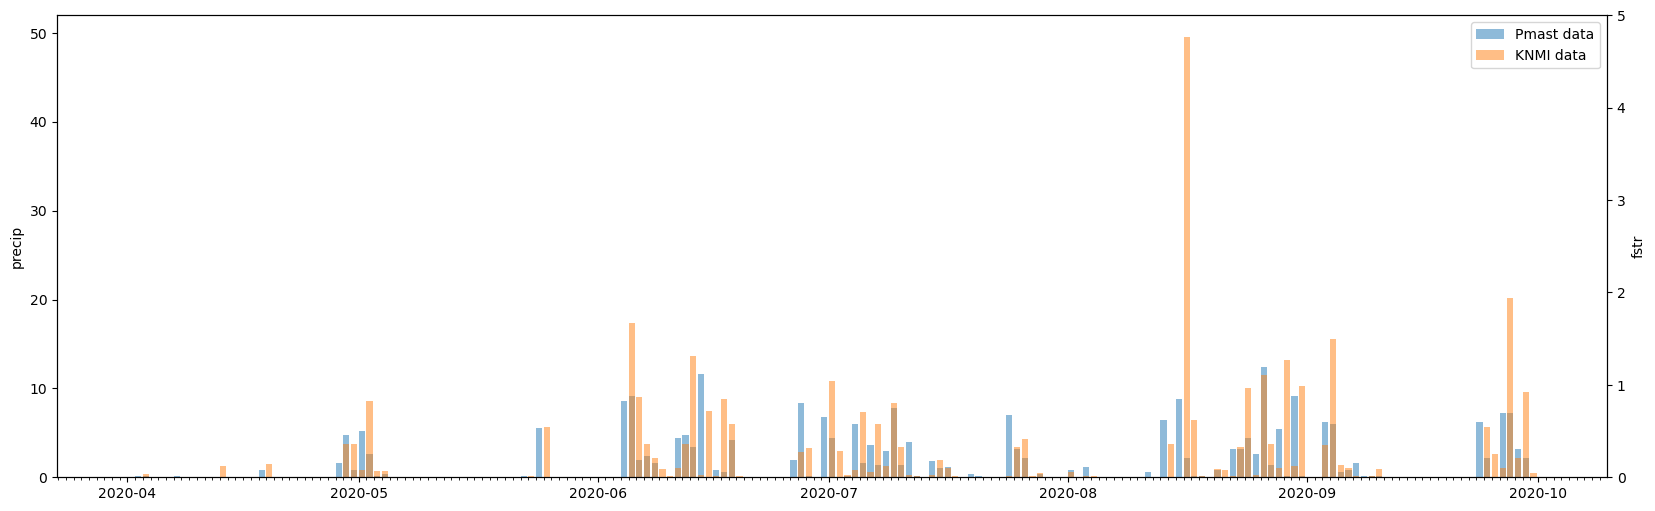

In [51]:
plt.rcParams["figure.figsize"] = (20,6)



def fstr_plot_wrapper(st,ed):

    fig,ax = plt.subplots()
    
    b=df_ET.loc[st:ed,['P(mast)']].resample('1D').sum()
    a=(knmi_regen.loc[st:ed,['RD']]/10)
    ax.bar(b.index,b['P(mast)'],alpha=0.5, align='edge', label="Pmast data")
    ax.bar(a.index,a['RD'],alpha=0.5, align='edge', label="KNMI data")
    
    df_tmp30m=pd.DataFrame()
    df_tmp30m['ET']=df_ET['ET_VPD']
    df_tmp30m['P(mast)']=df_ET['P(mast)']
    df_tmp30m=df_tmp30m.dropna()
    
    df_LE=df_Comb['LE'].loc[df_Comb['LE']>=0]
    df_tmp30m=df_tmp30m.merge(df_LE, how='inner',left_index=True, right_index=True)
    c=df_tmp30m.loc[st:ed].resample('1D').sum()
    c['LE/ET']=c['LE']/c['ET']
    
    ax.set_ylabel("precip")
    ax2 = ax.twinx()
    ax2.set_ylim(0,5)
    ax2.set_ylabel("fstr")
    #ax2.set_yscale('log')
    
    ax2.scatter(c.index,c['LE/ET'],c=np.where(c['LE/ET']<1,'b','r'))
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())

for year in range(2001,2021):
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    fstr_plot_wrapper(st,ed)

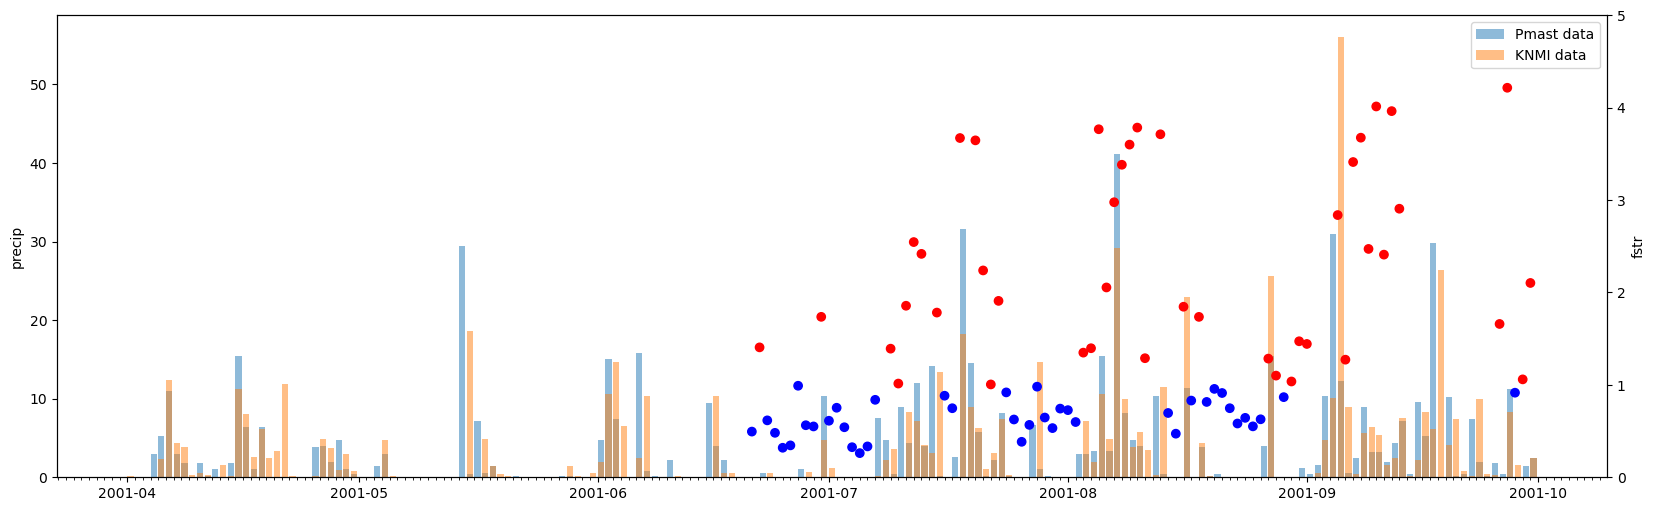

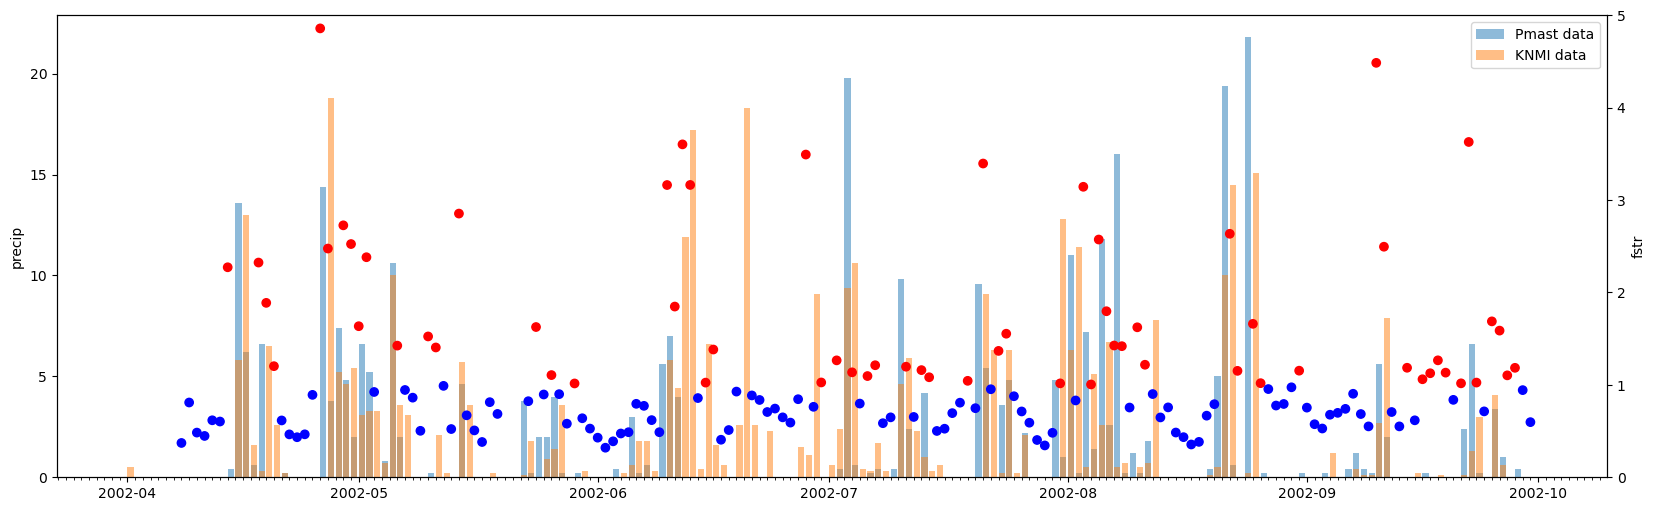

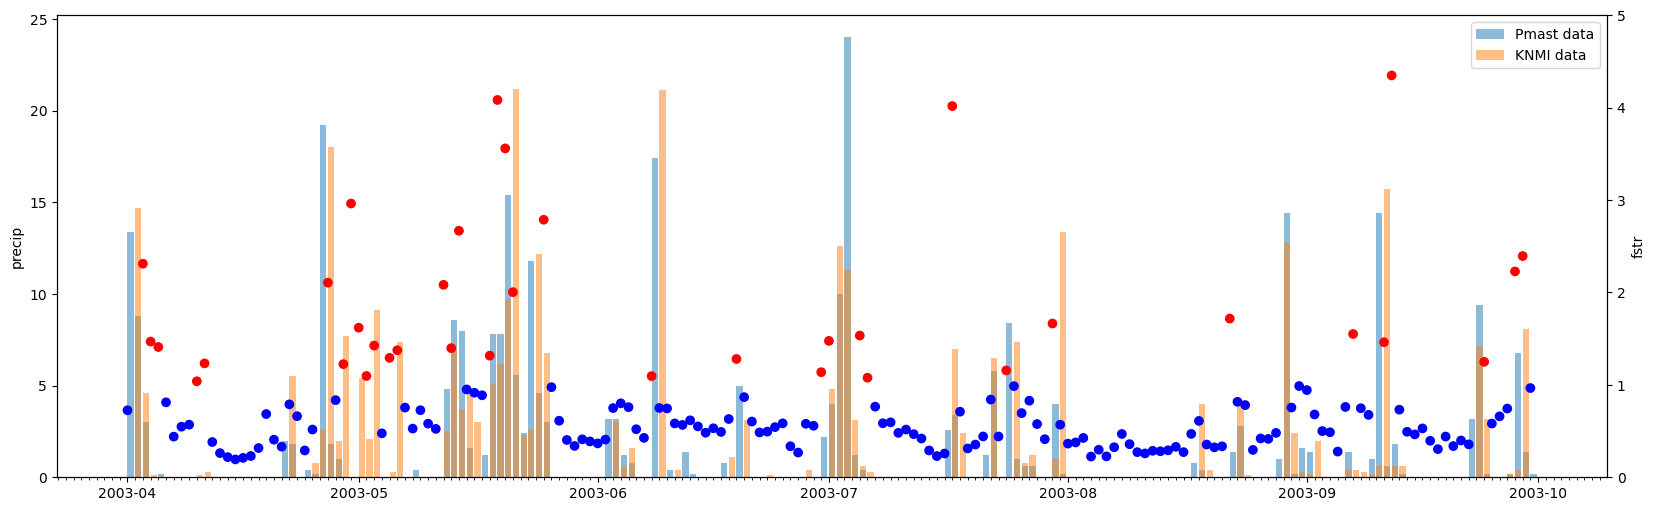

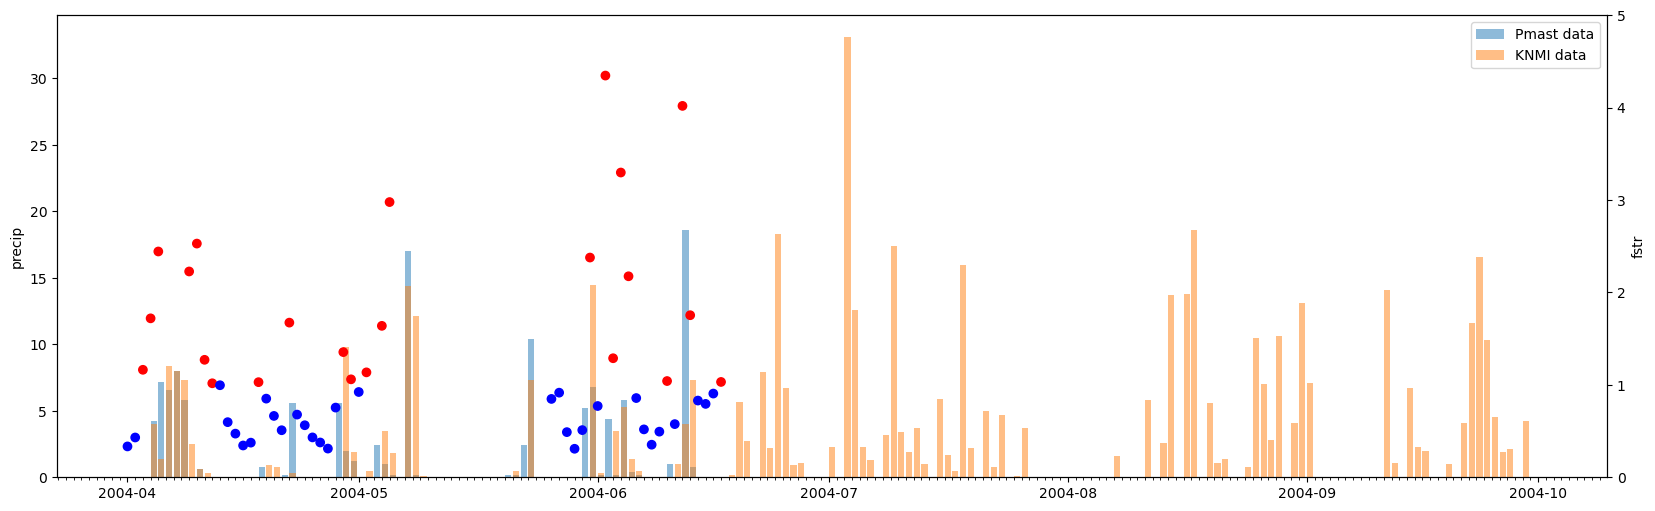

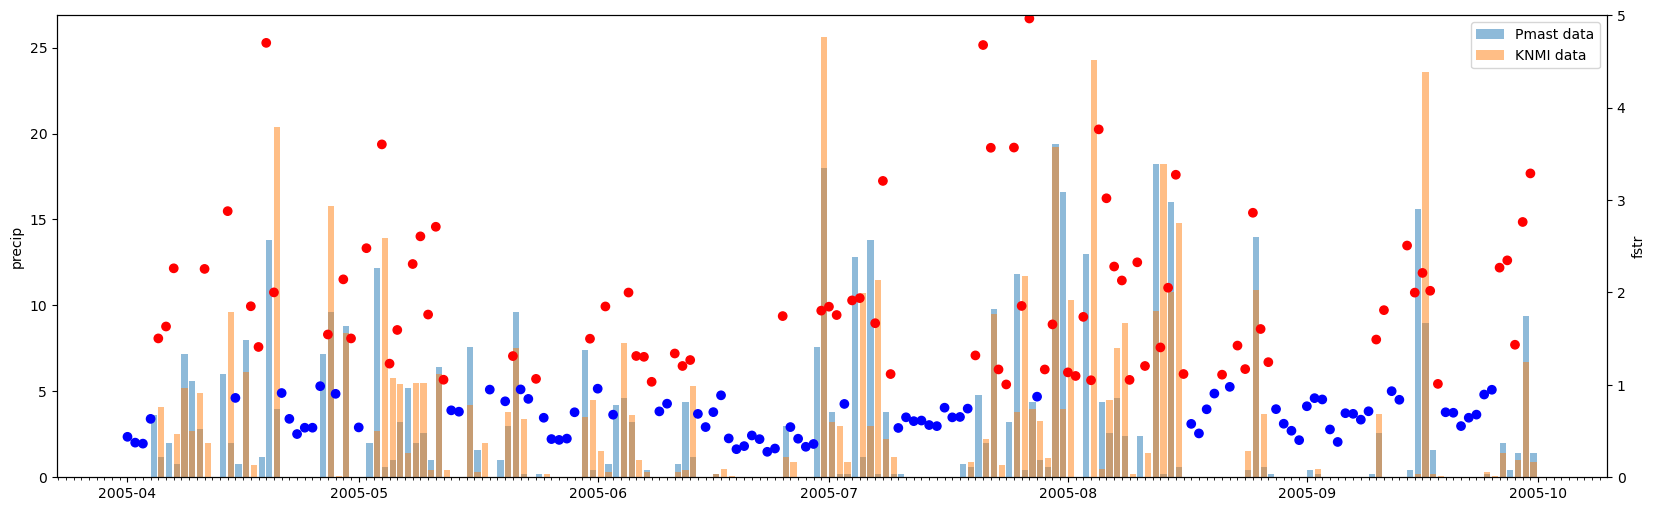

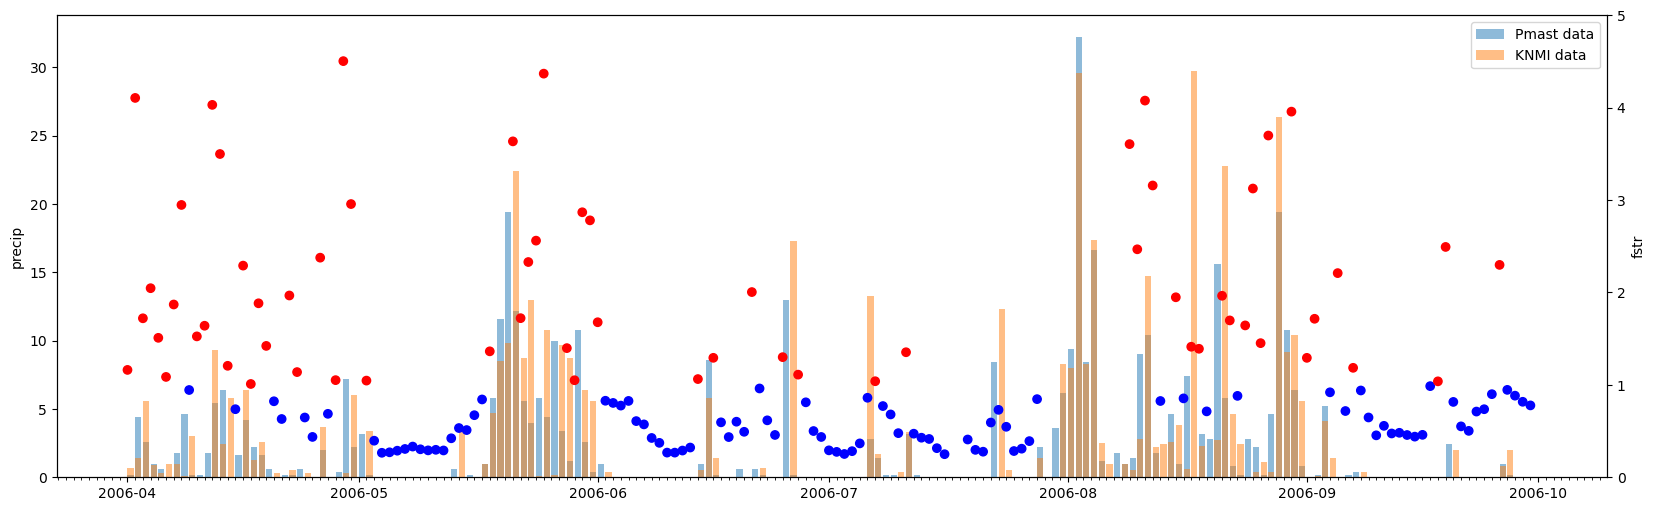

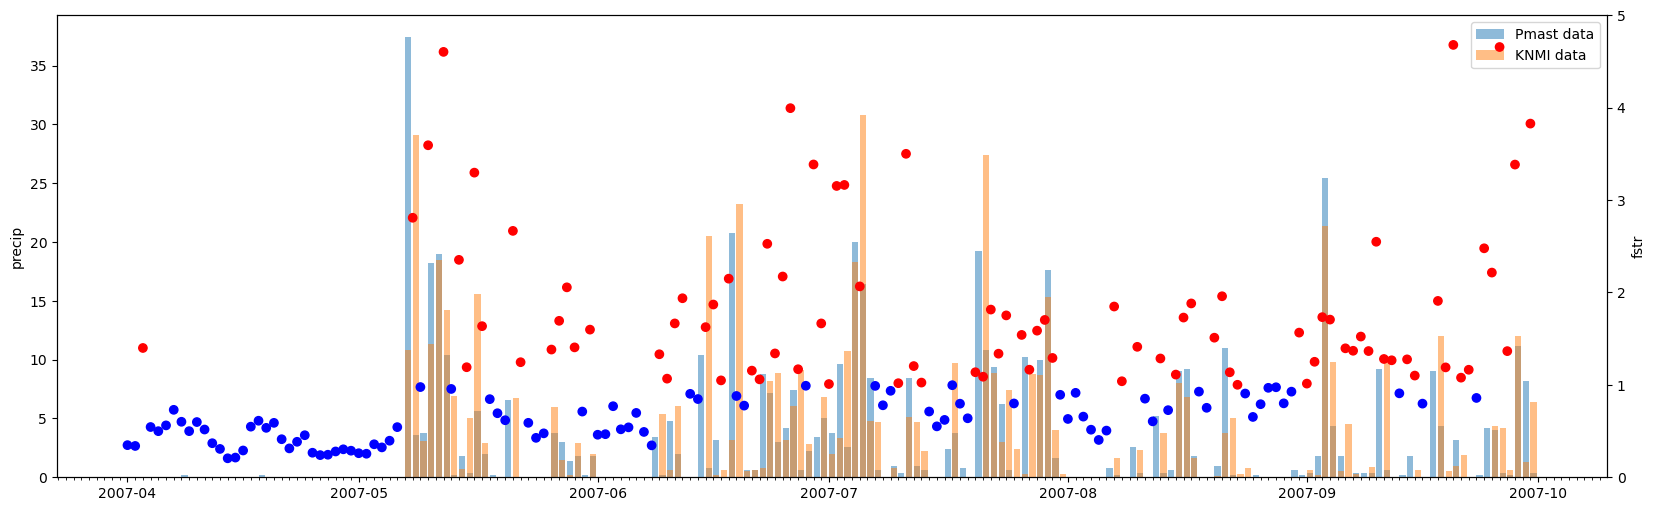

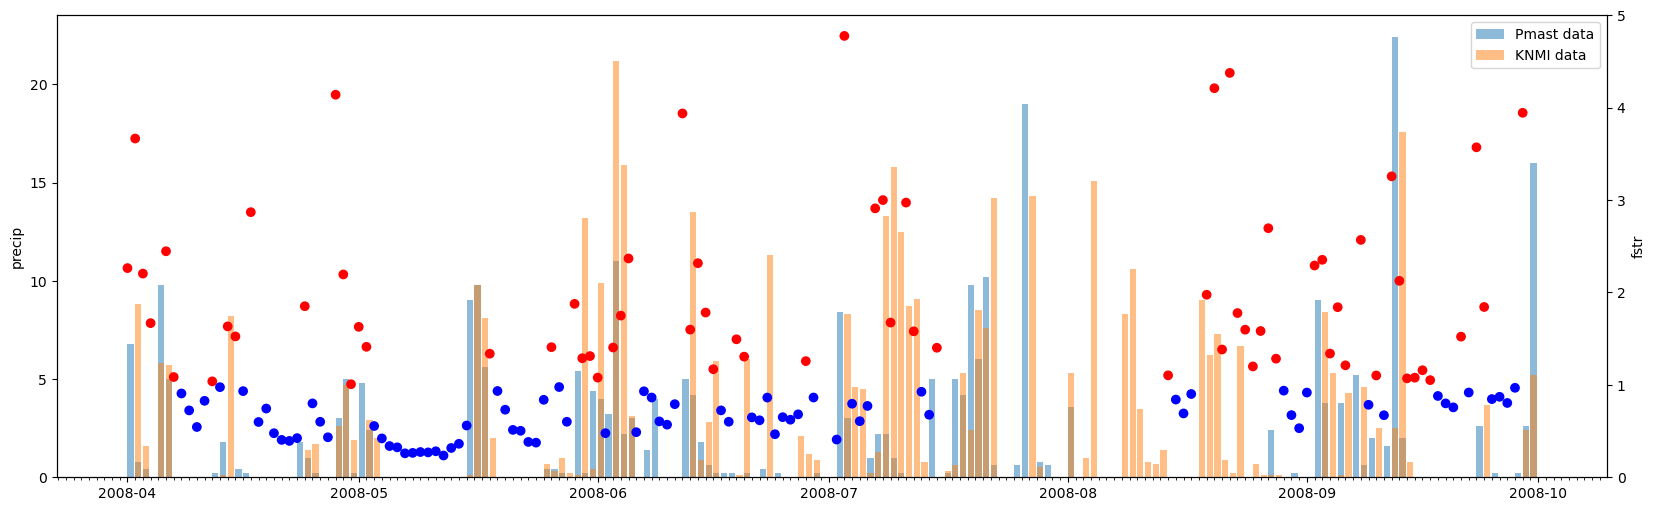

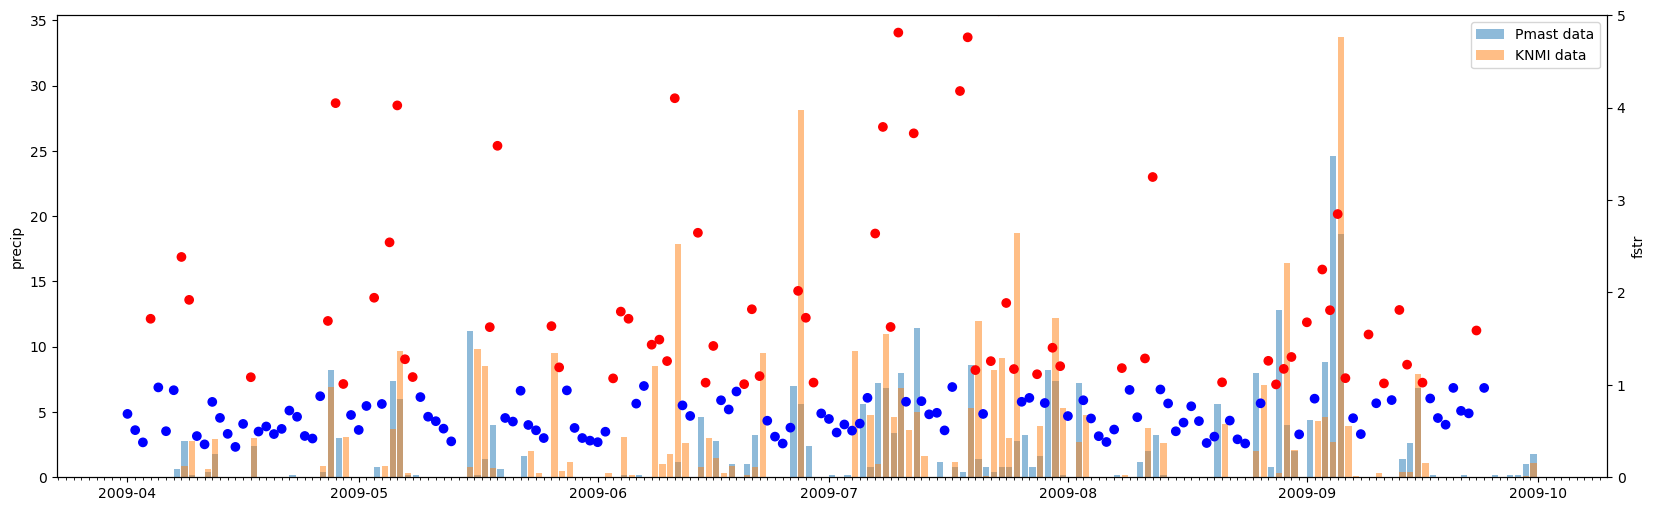

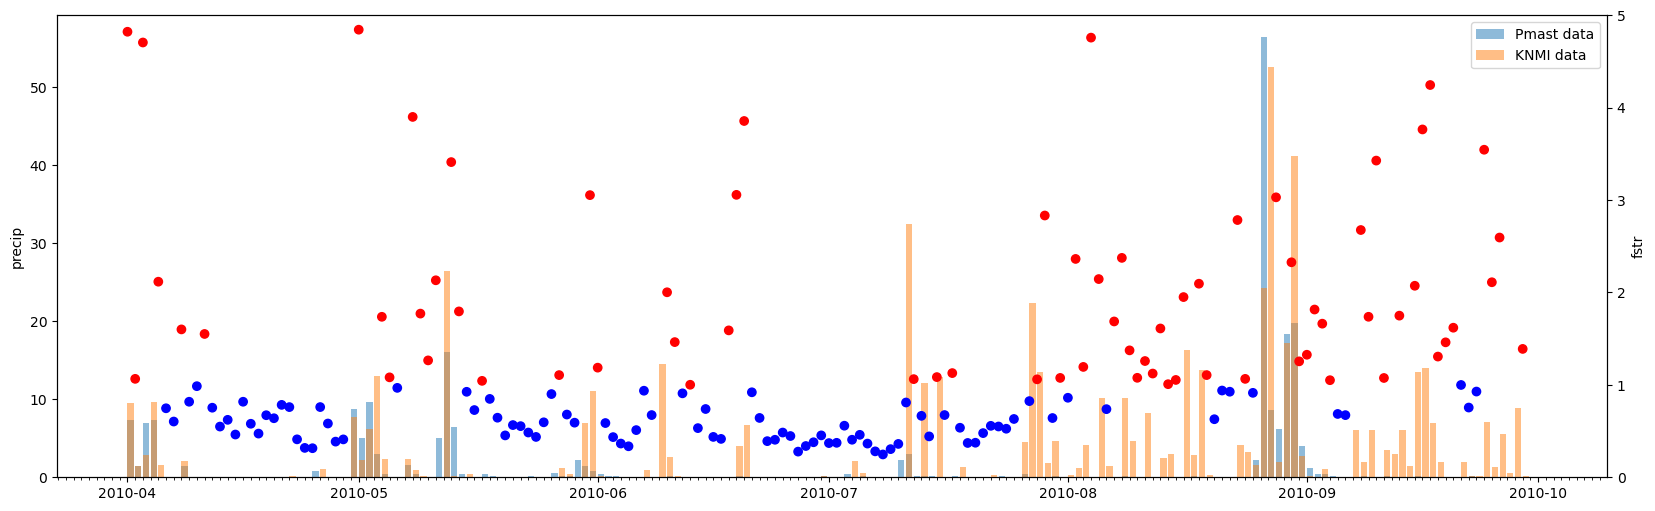

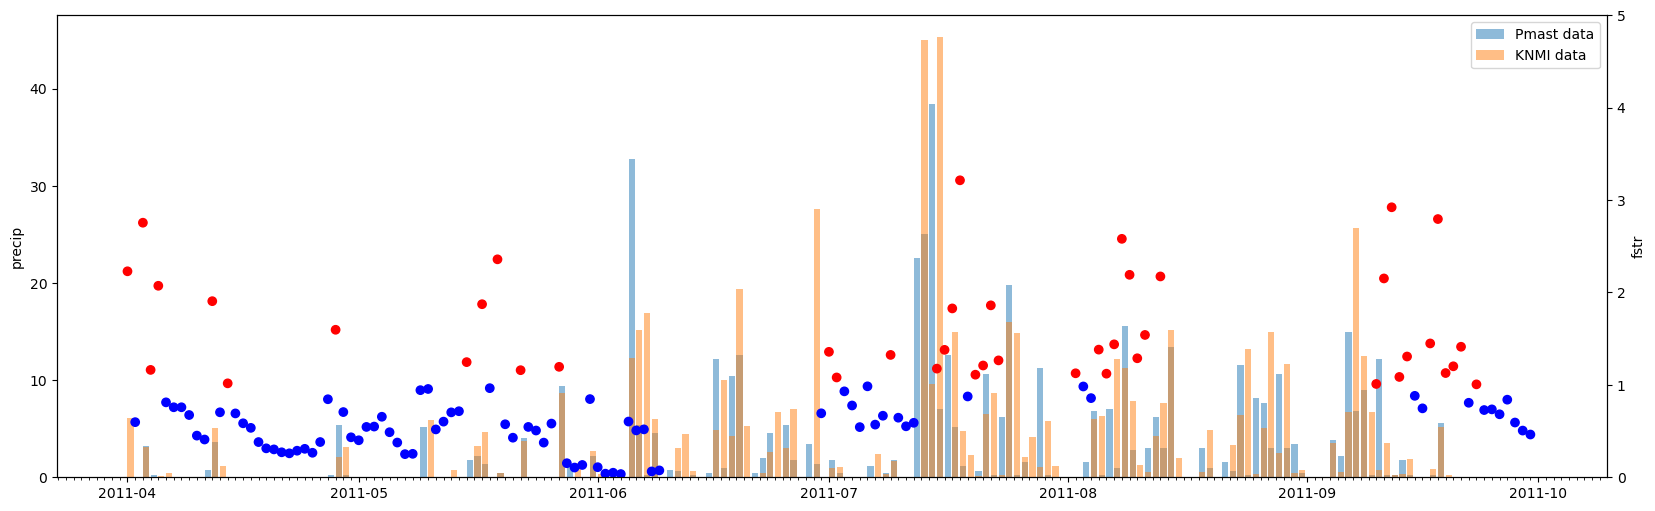

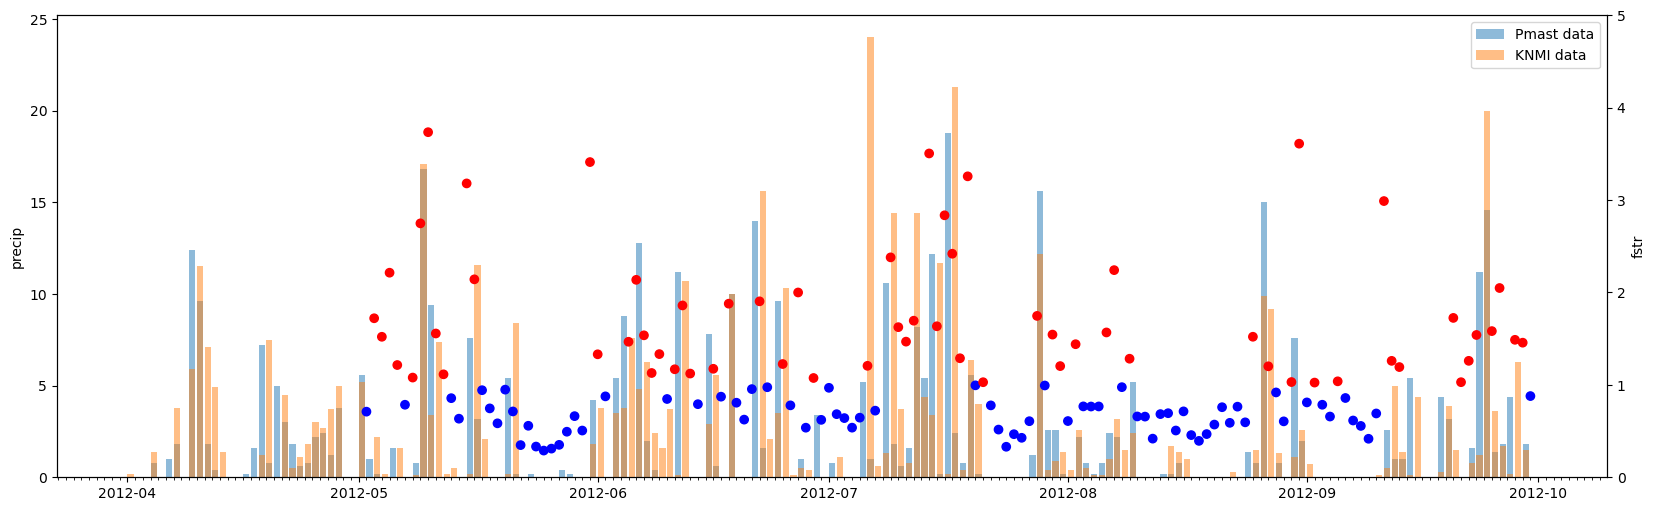

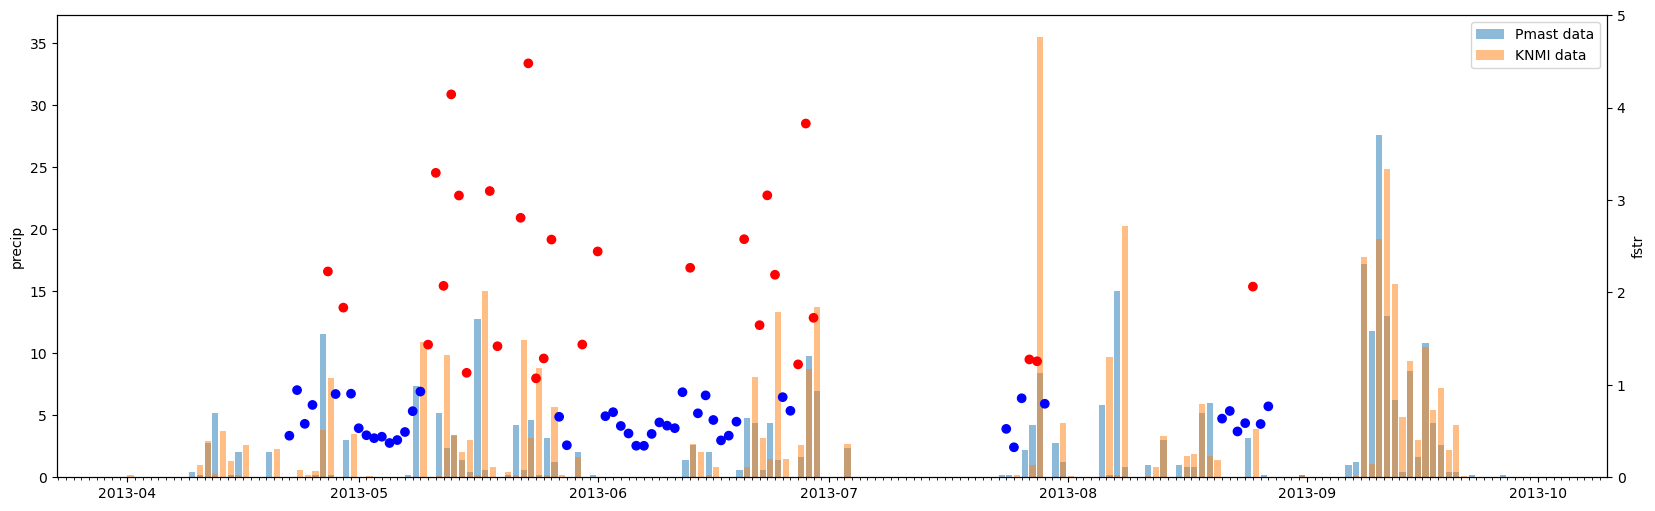

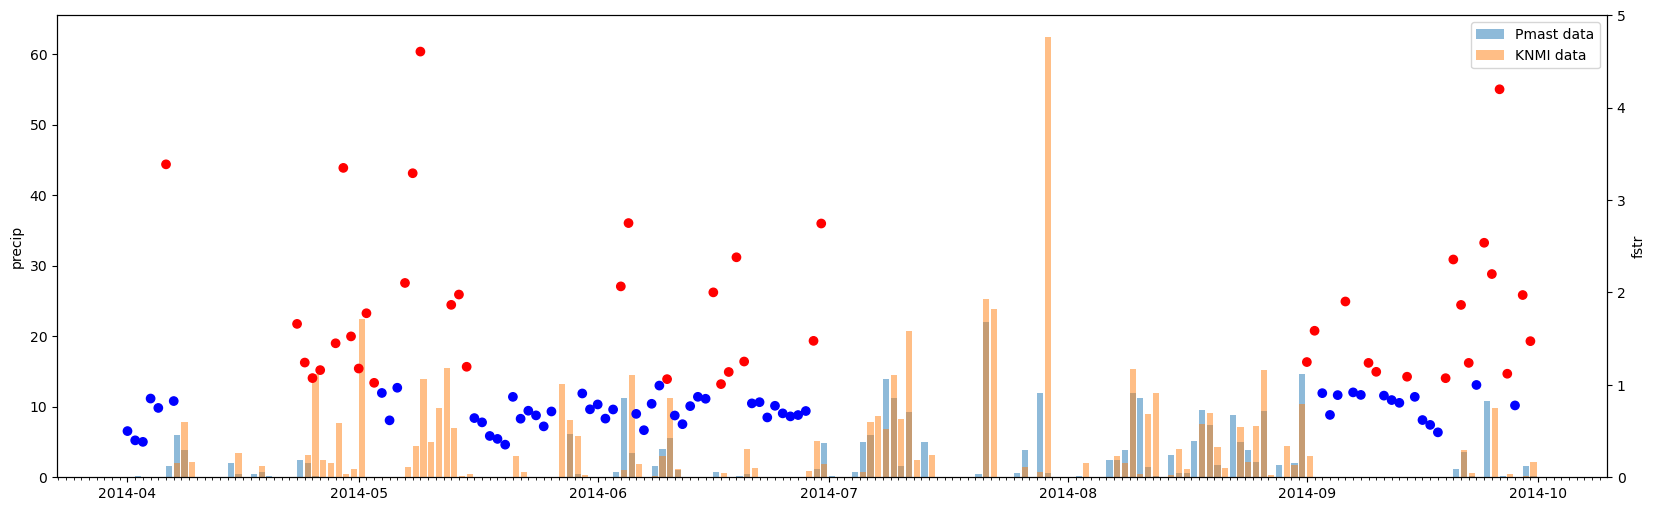

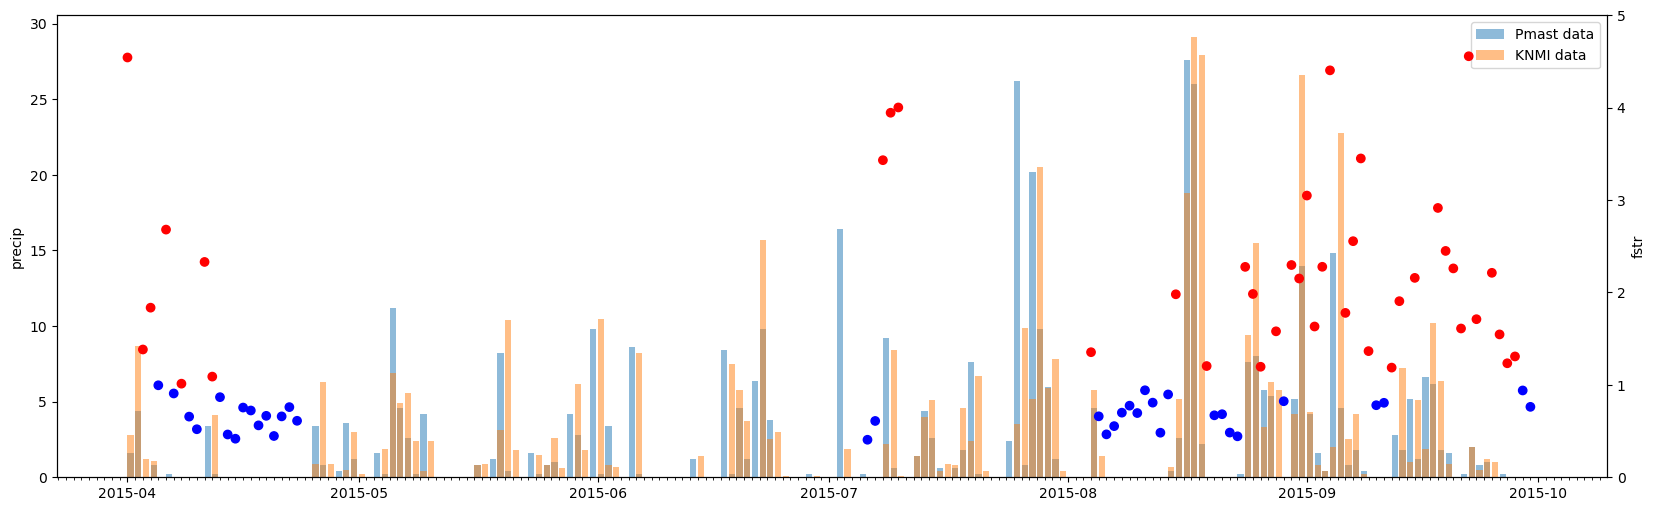

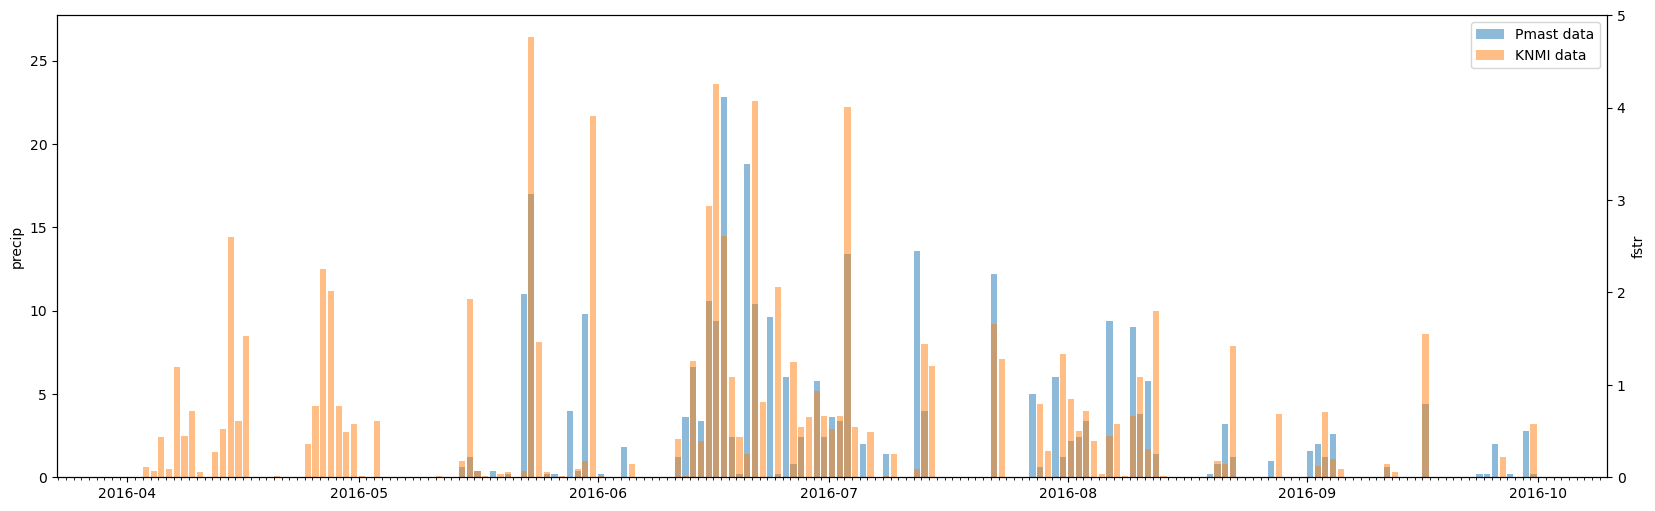

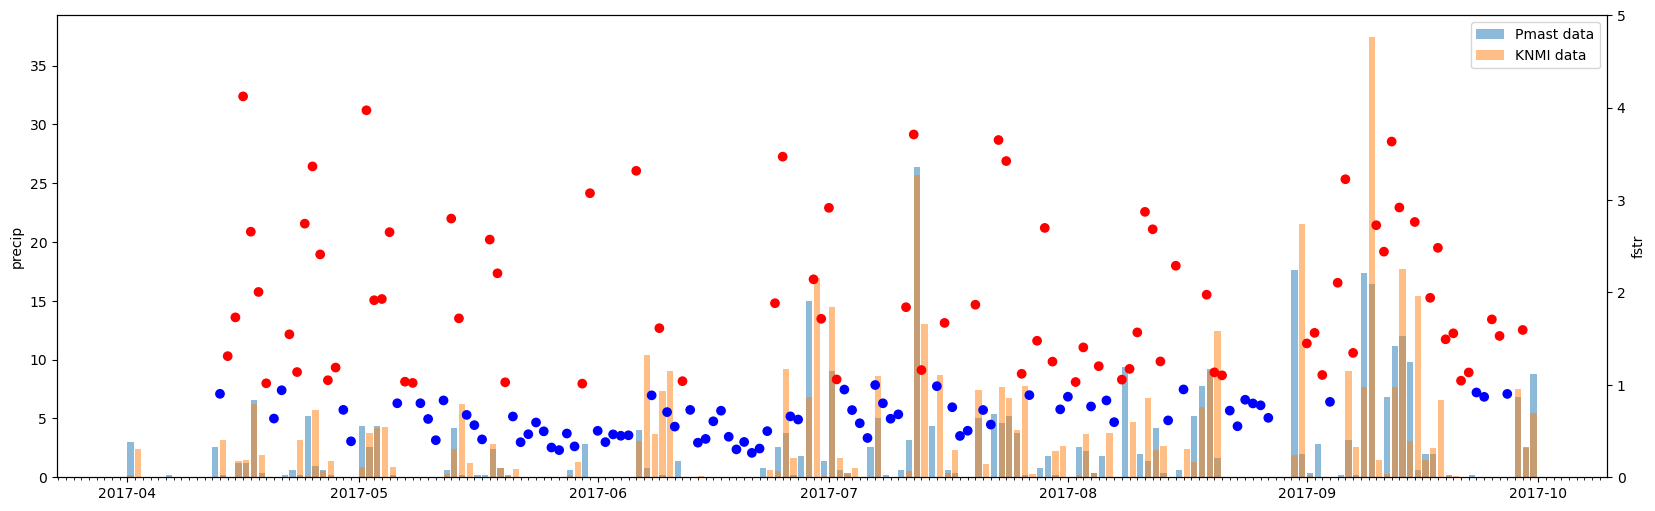

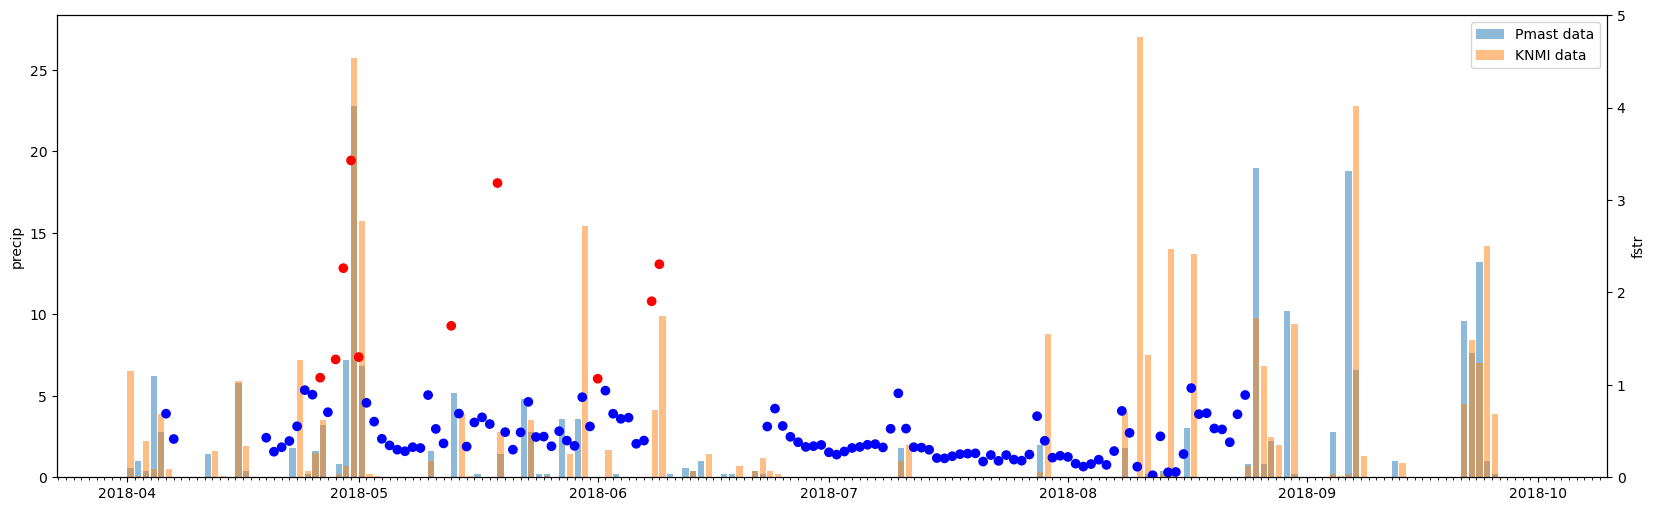

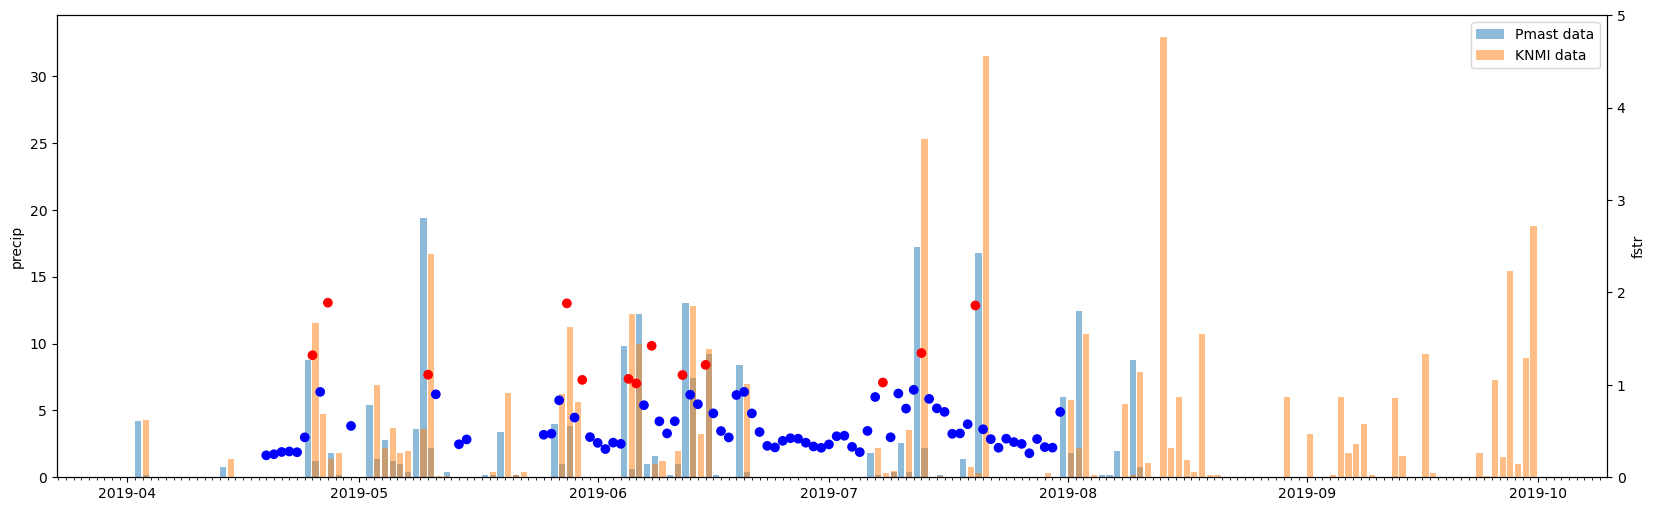

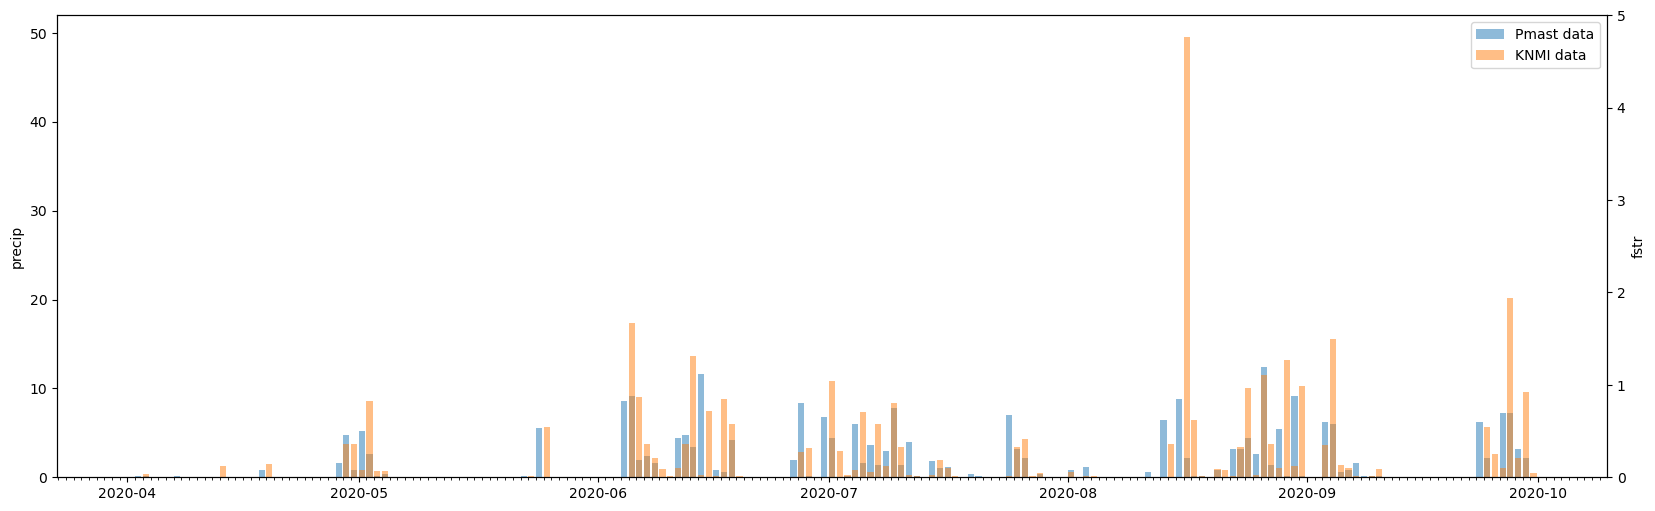

In [28]:
plt.rcParams["figure.figsize"] = (20,6)



def fstr_plot_wrapper(st,ed):

    fig,ax = plt.subplots()
    
    b=df_ET.loc[st:ed,['P(mast)']].resample('1D').sum()
    a=(df_rain.loc[st:ed,['RD']])
    ax.bar(b.index,b['P(mast)'],alpha=0.5, align='edge', label="Pmast data")
    ax.bar(a.index,a['RD'],alpha=0.5, align='edge', label="KNMI data")
    
    df_tmp30m=pd.DataFrame()
    df_tmp30m['ET']=df_ET['ET_VPD']
    df_tmp30m['P(mast)']=df_ET['P(mast)']
    df_tmp30m=df_tmp30m.dropna()
    
    df_LE=df_Comb['LE'].loc[df_Comb['LE']>=0]
    df_tmp30m=df_tmp30m.merge(df_LE, how='inner',left_index=True, right_index=True)
    c=df_tmp30m.loc[st:ed].resample('1D').sum()
    c['LE/ET']=c['LE']/c['ET']
    
    ax.set_ylabel("precip")
    ax2 = ax.twinx()
    ax2.set_ylim(0,5)
    ax2.set_ylabel("fstr")
    #ax2.set_yscale('log')
    
    ax2.scatter(c.index,c['LE/ET'],c=np.where(c['LE/ET']<1,'b','r'))
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())

for year in range(2001,2021):
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    fstr_plot_wrapper(st,ed)

### New way

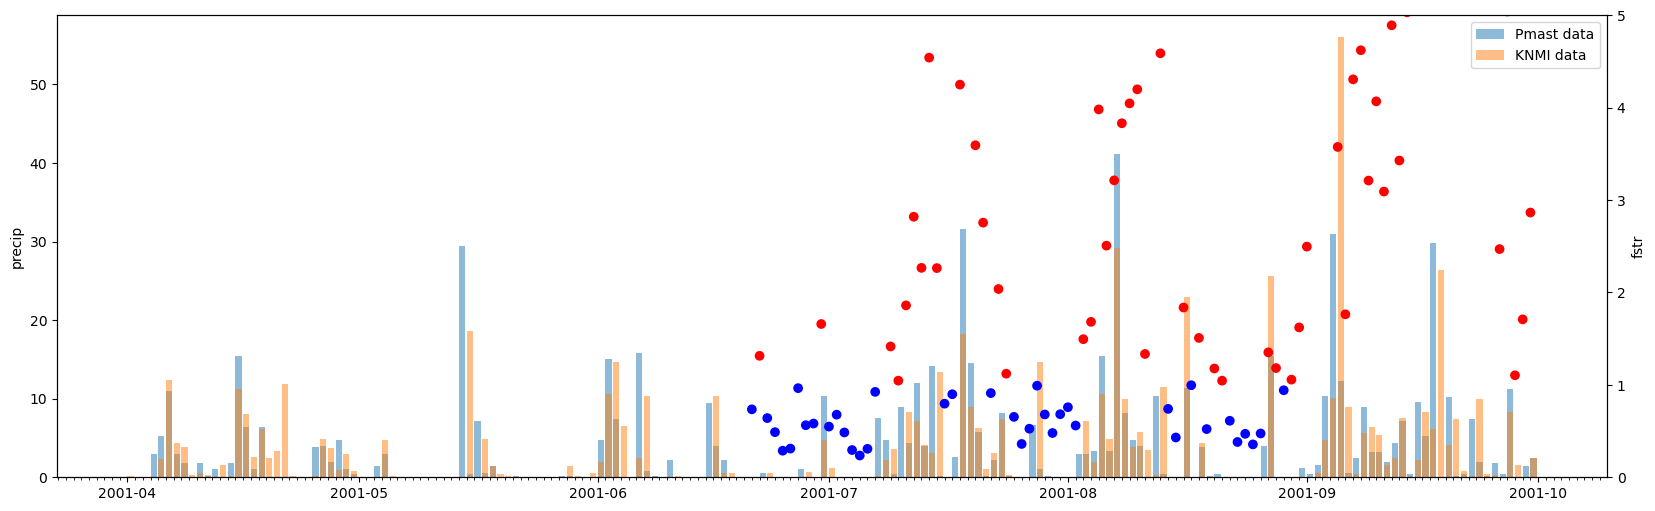

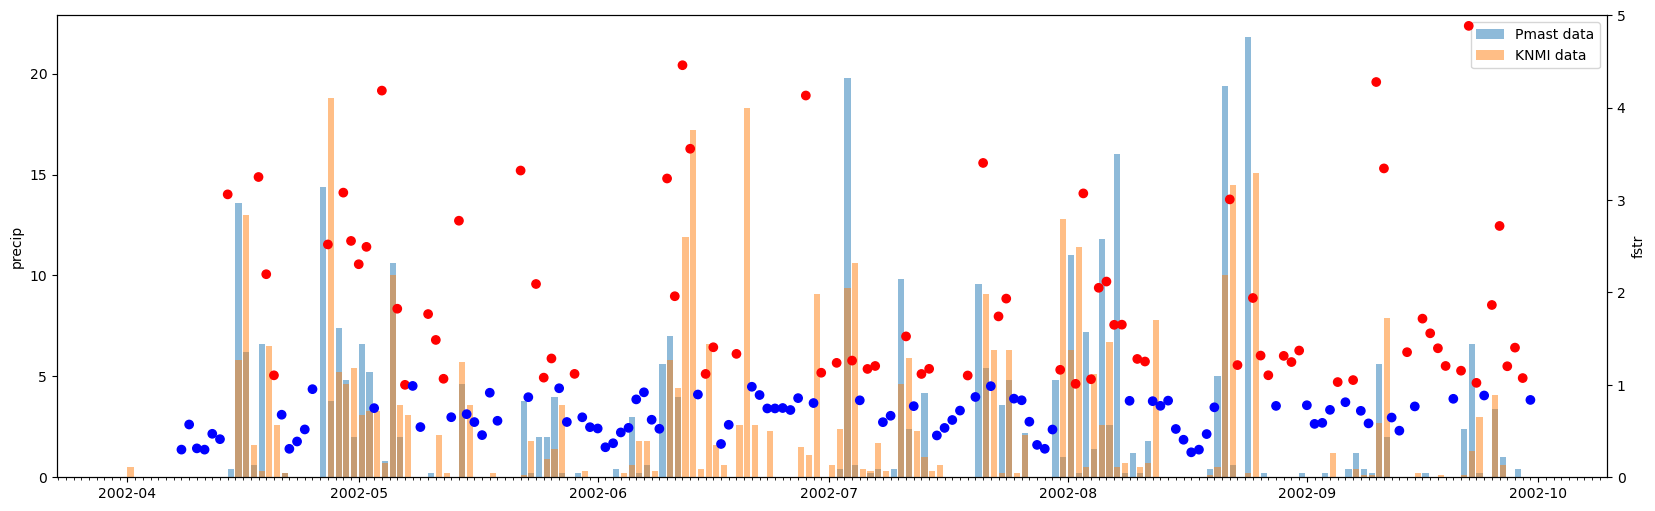

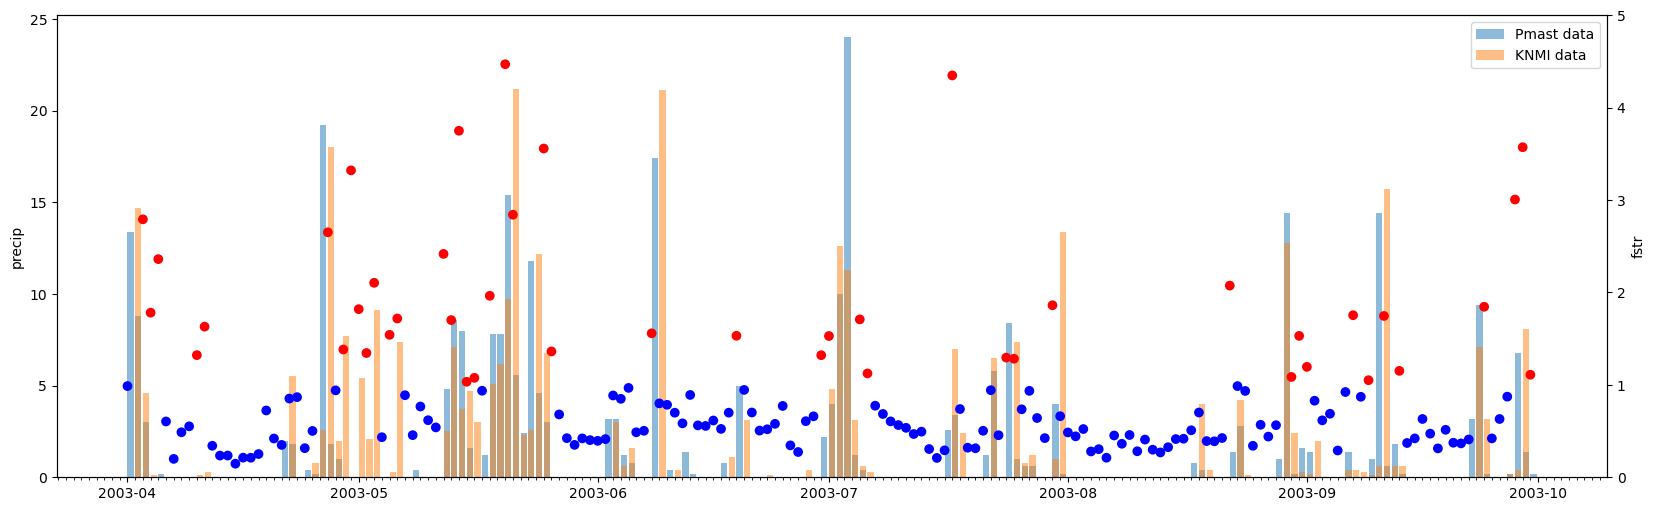

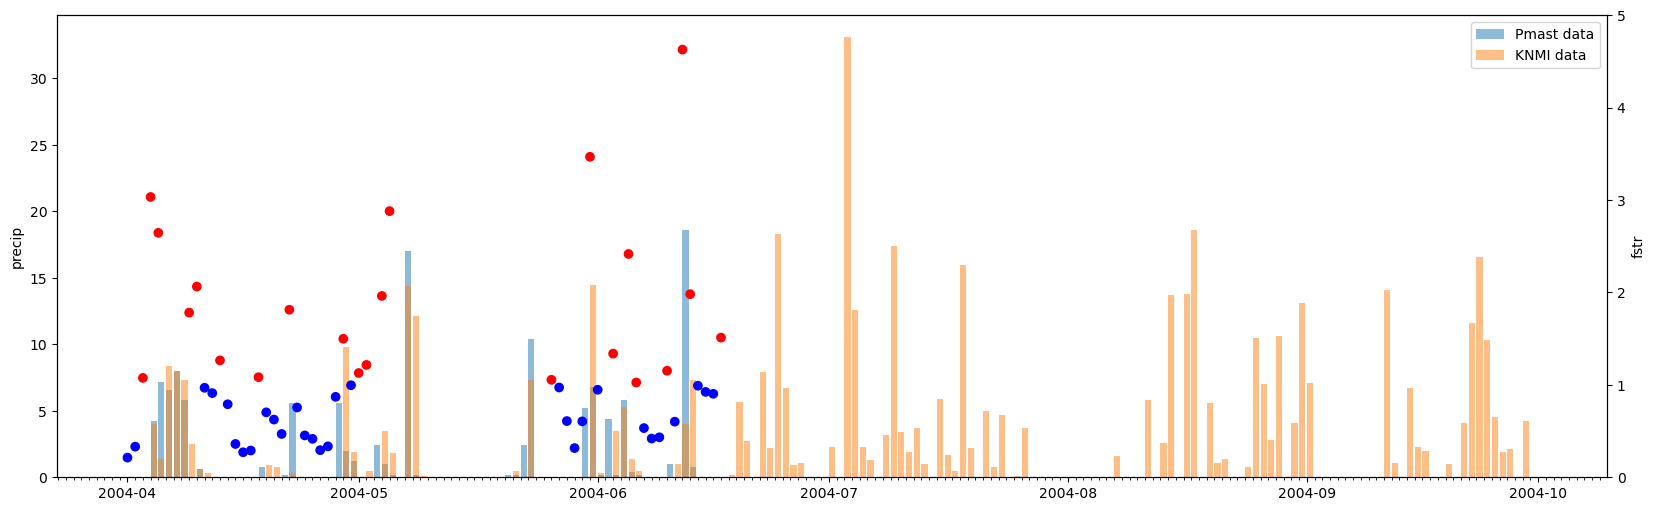

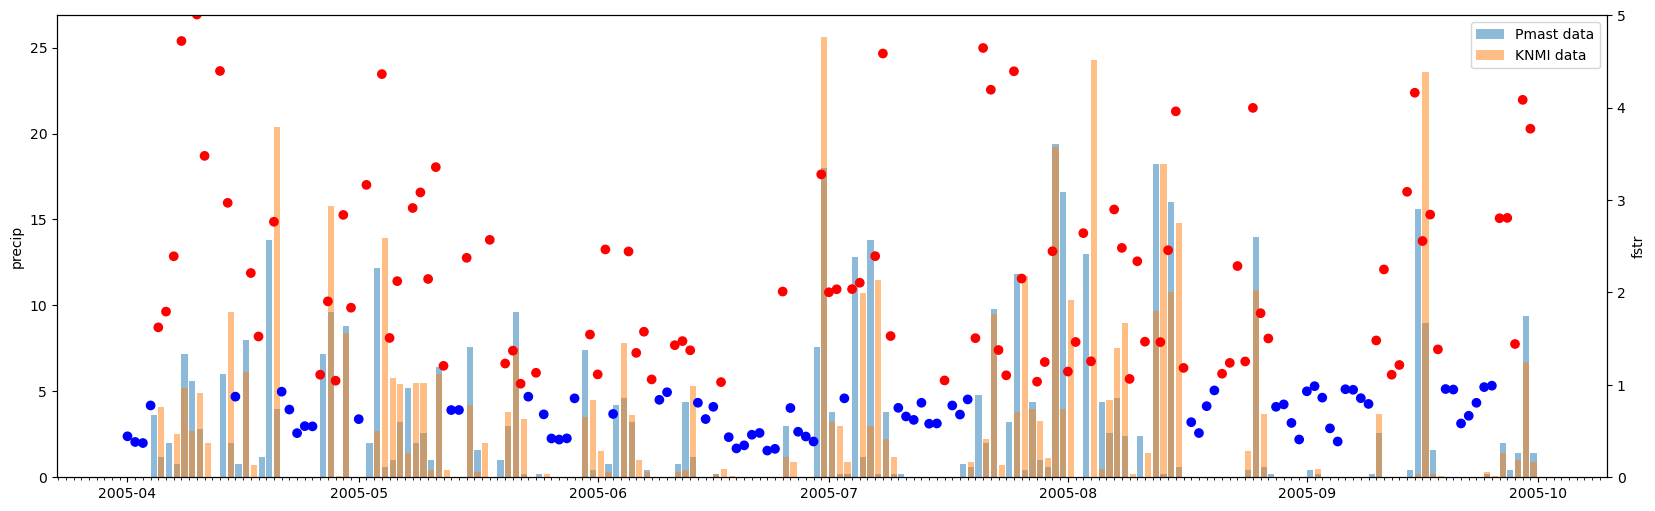

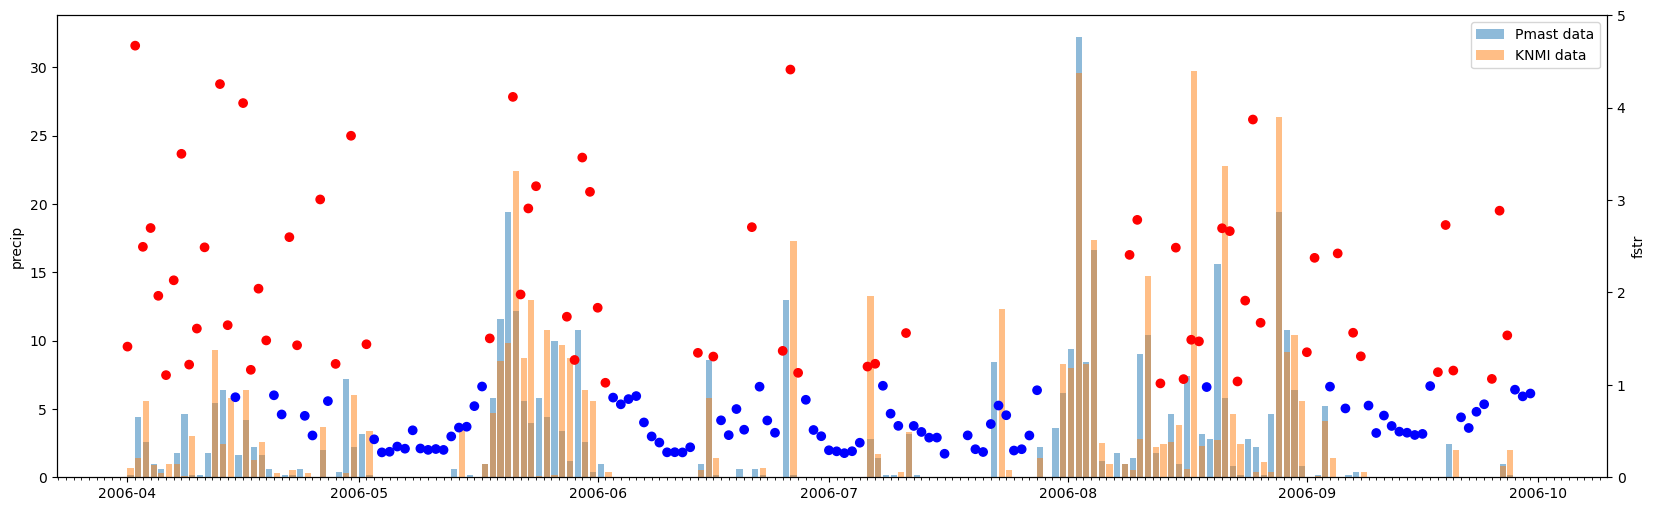

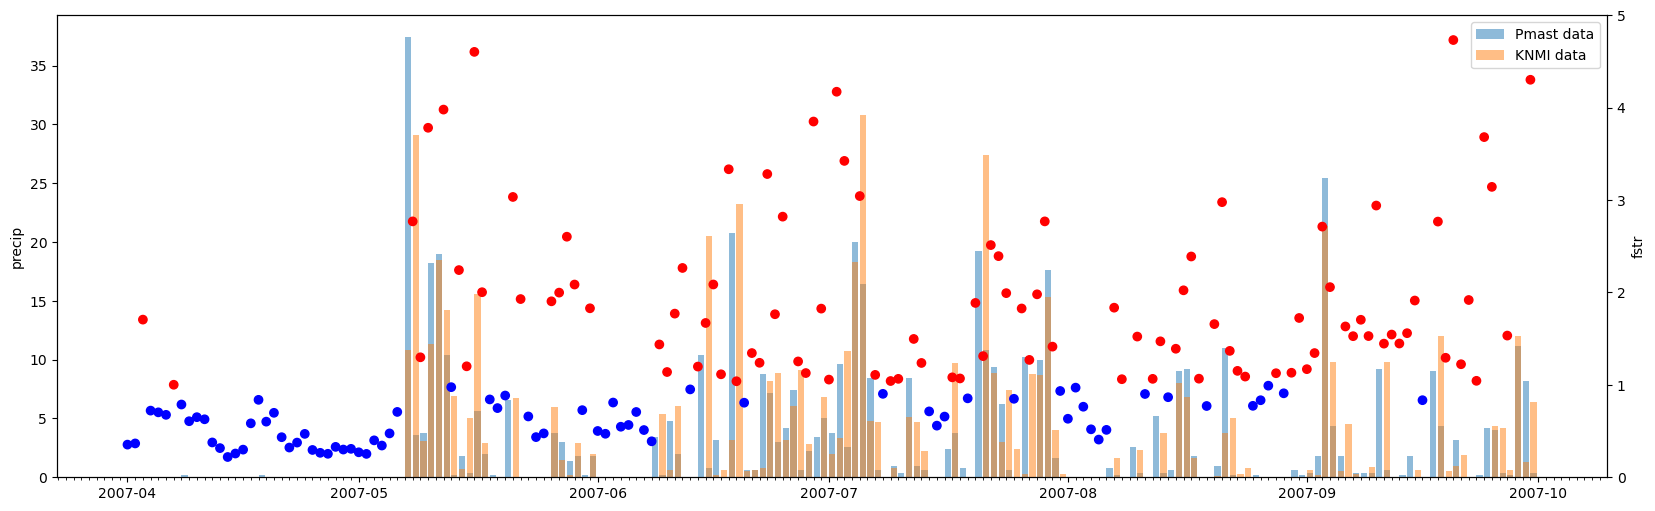

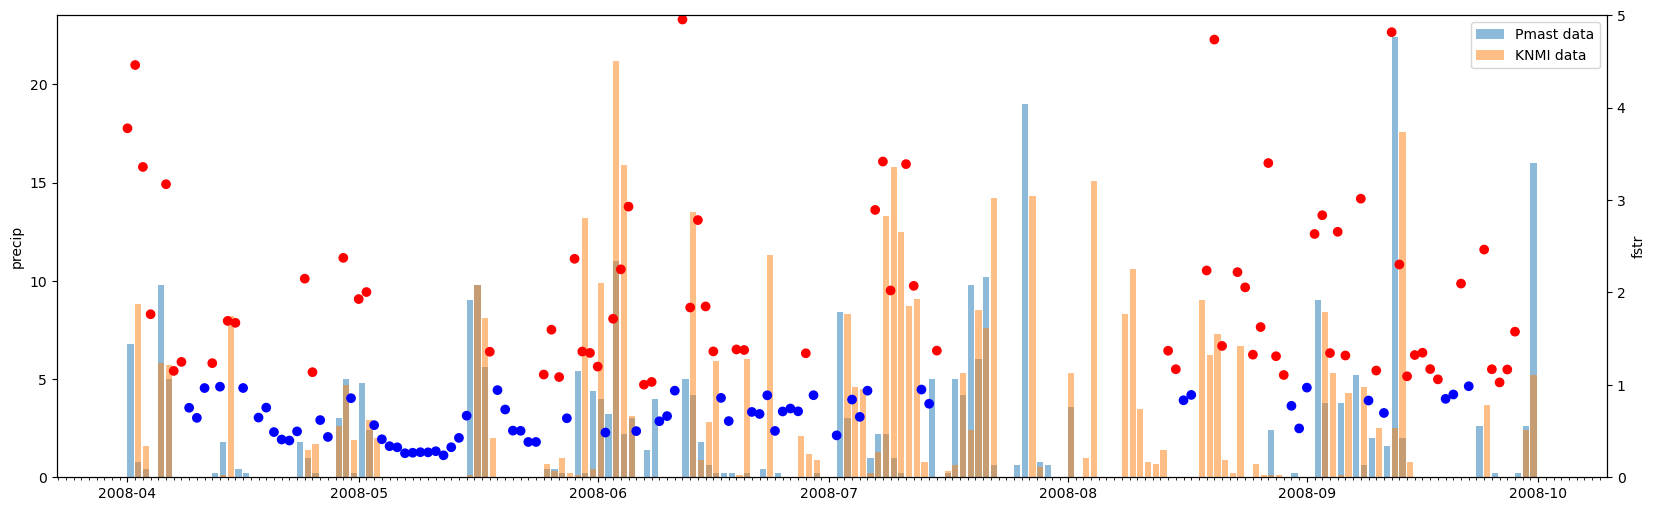

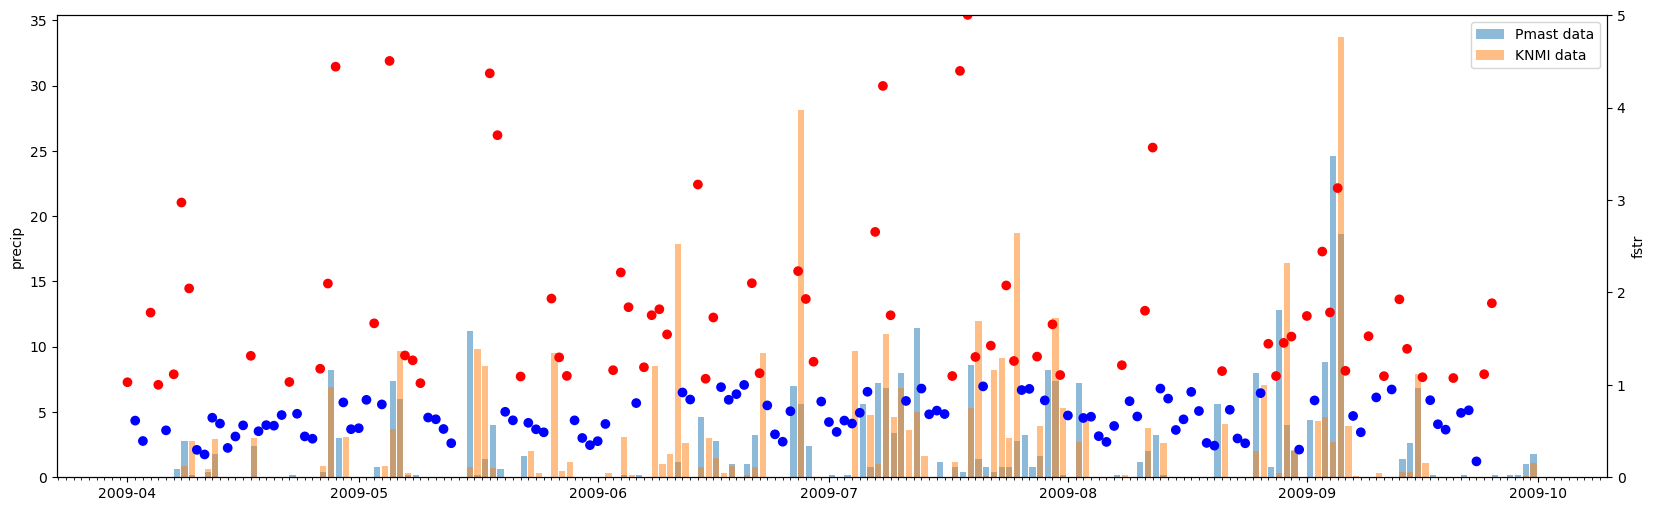

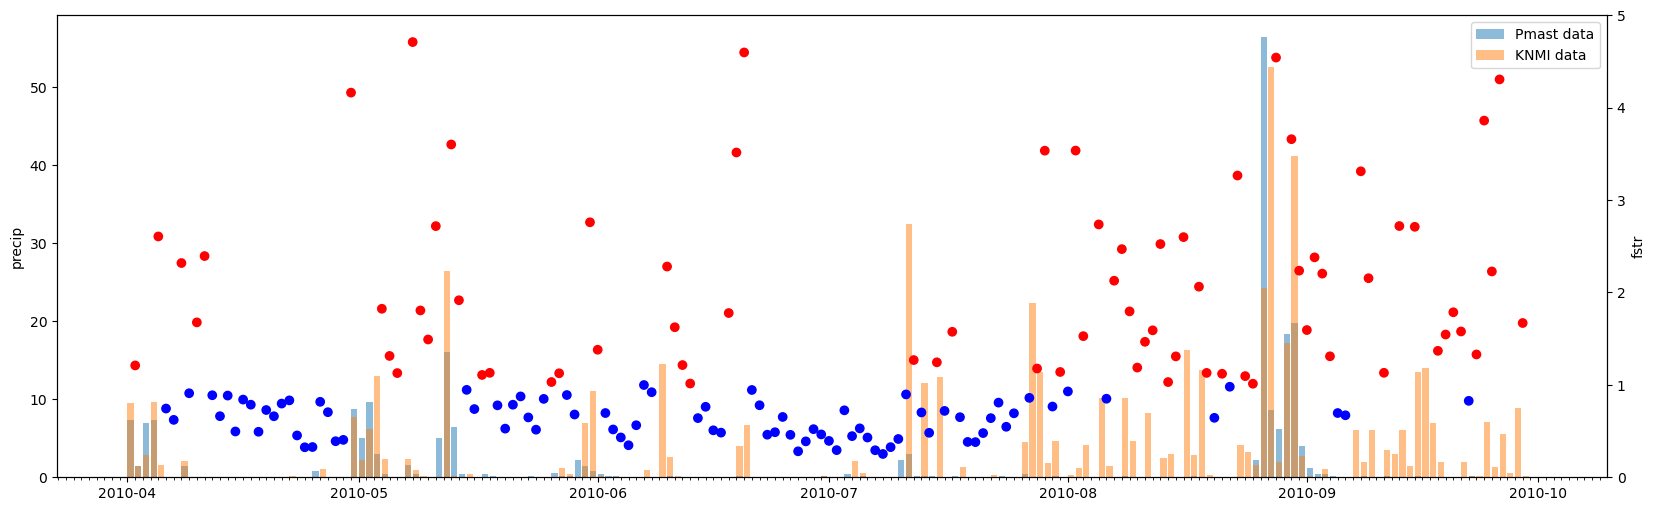

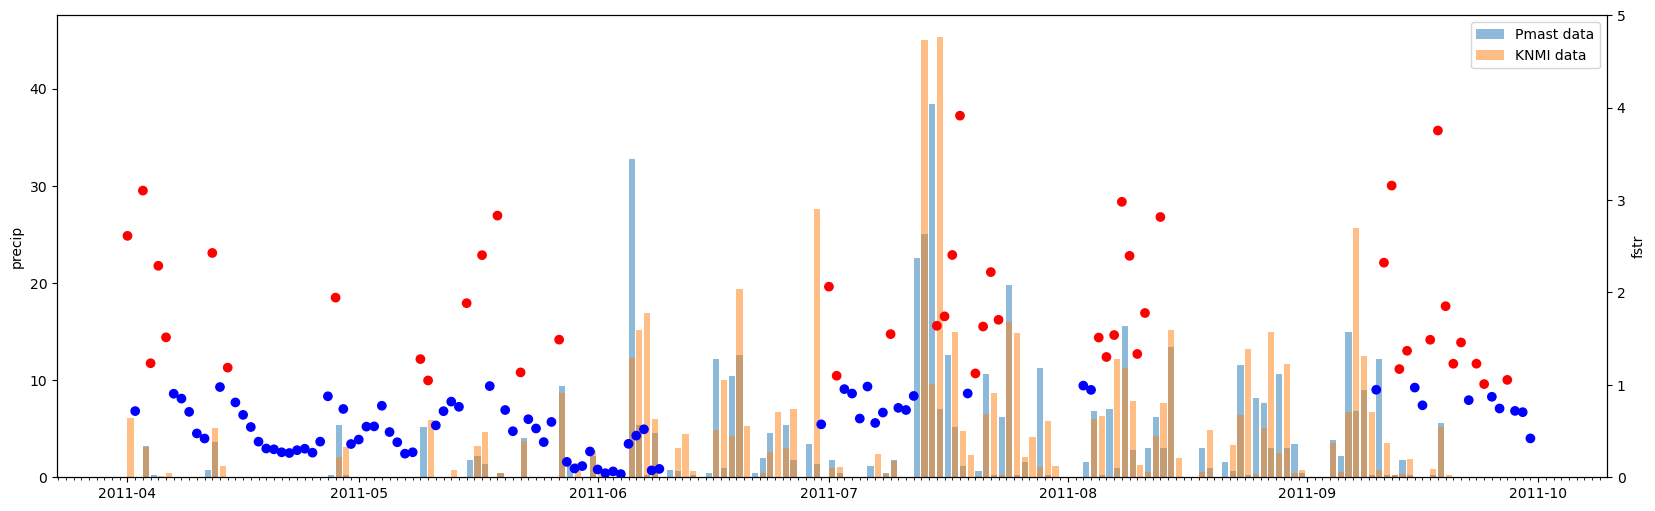

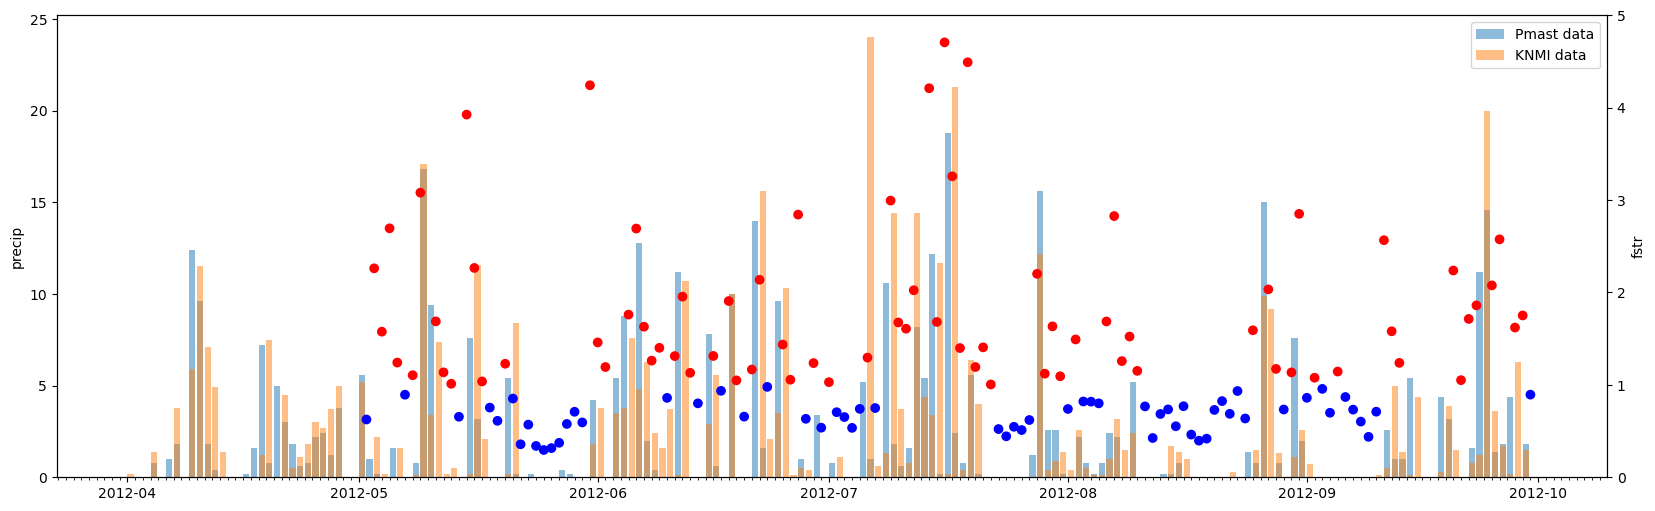

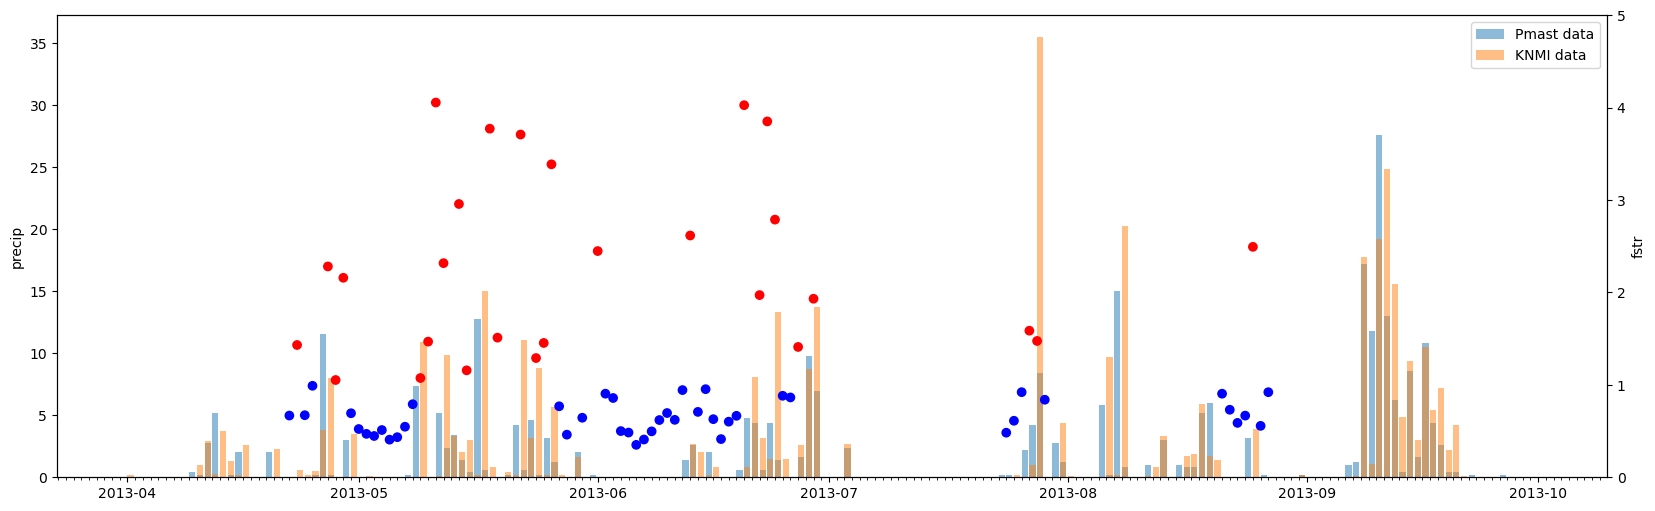

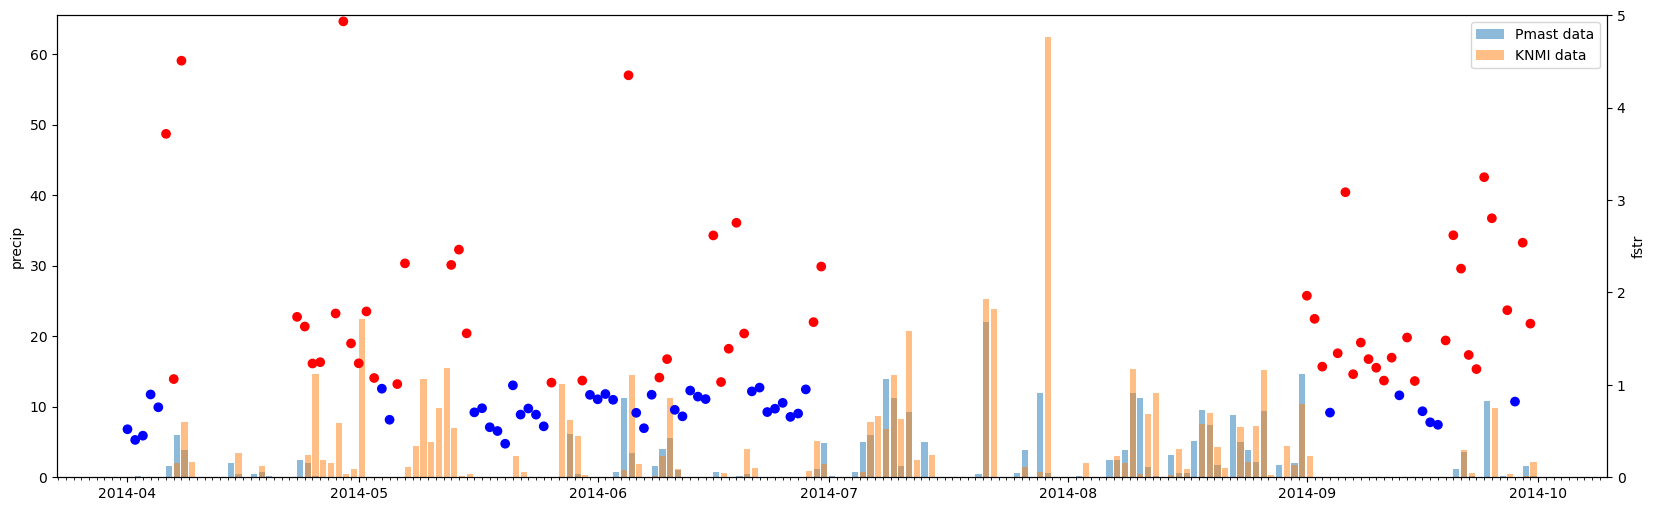

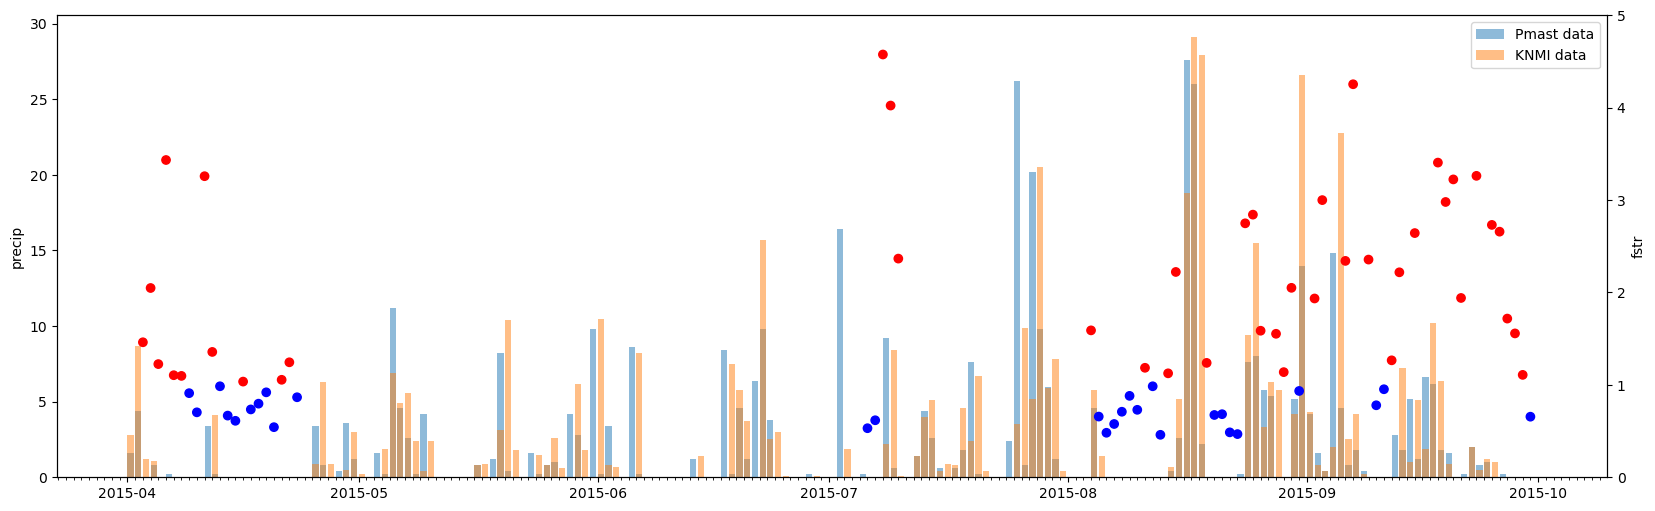

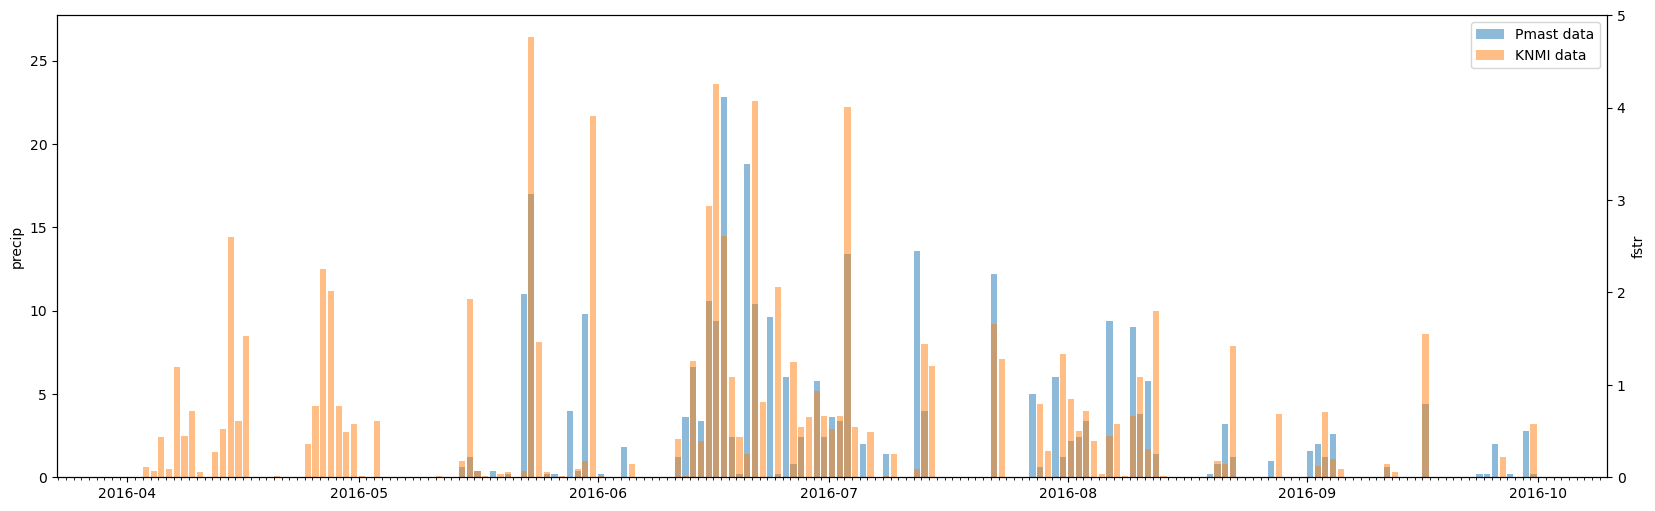

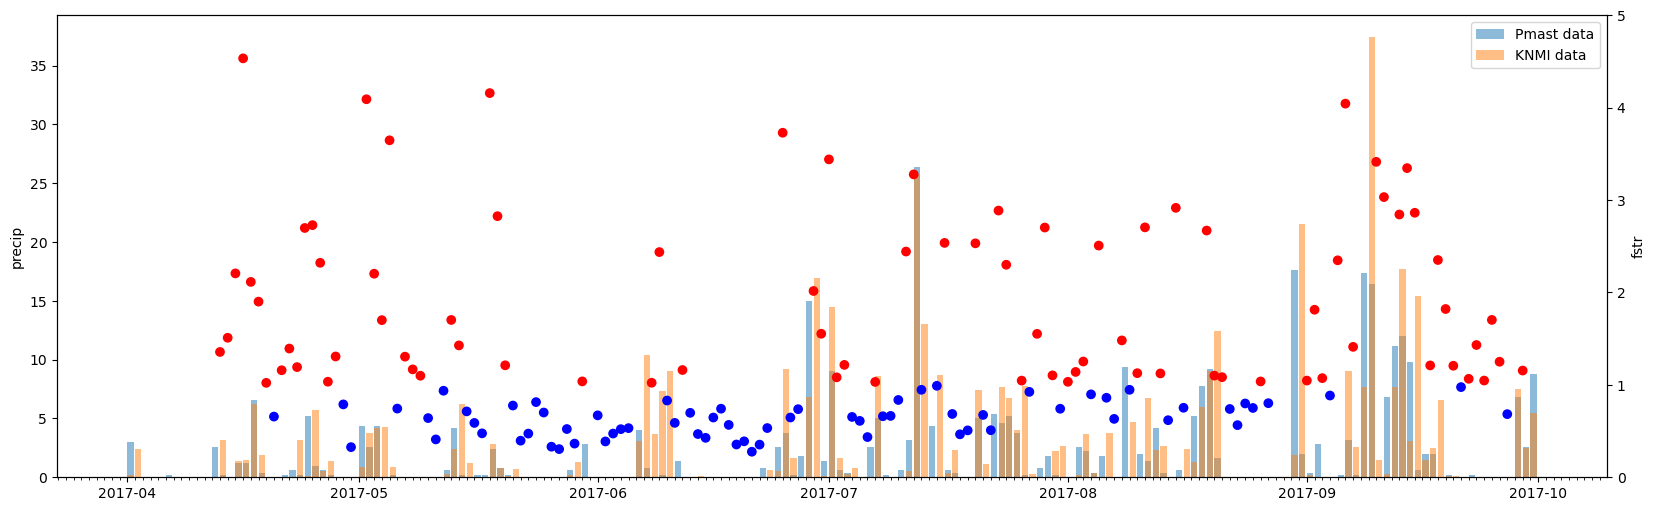

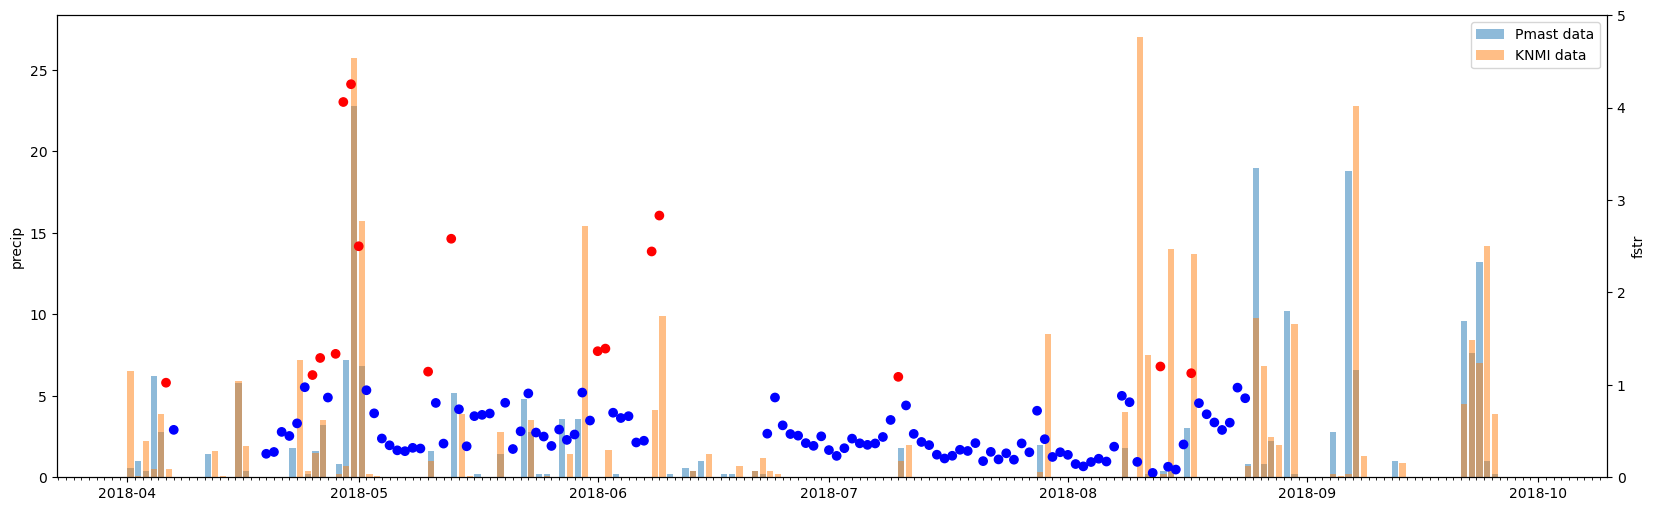

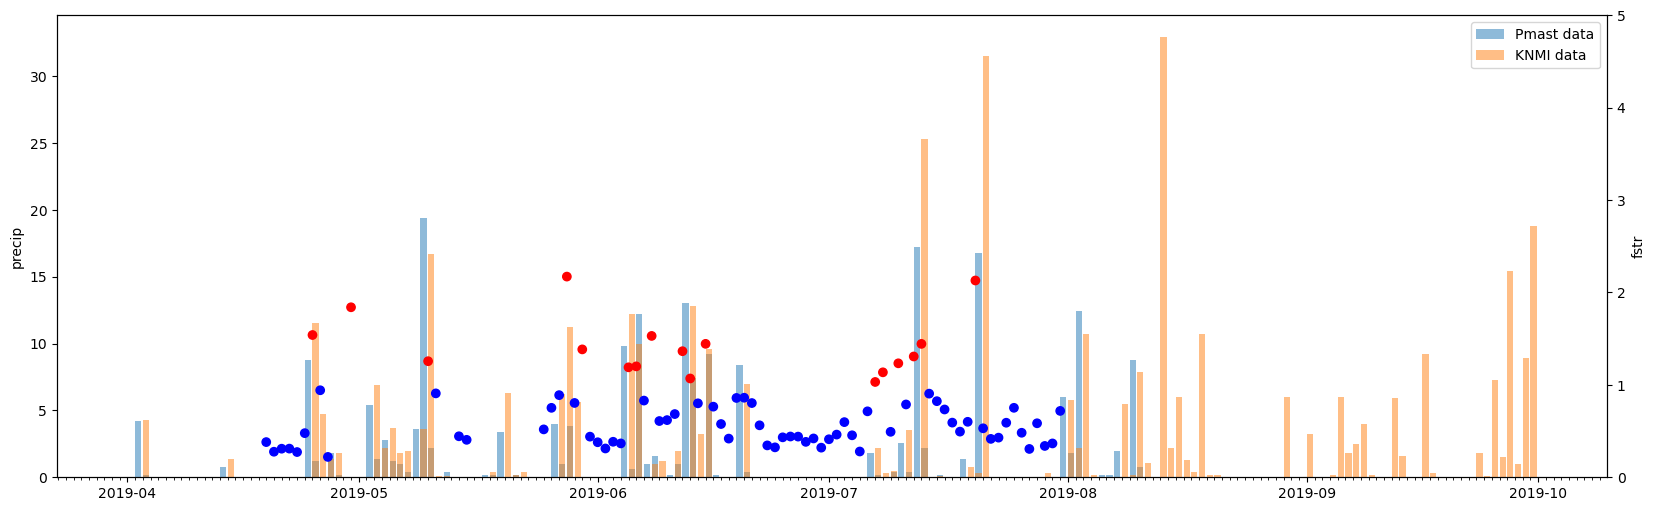

In [42]:
plt.rcParams["figure.figsize"] = (20,6)


def fstr_plot_wrapper(st,ed, df_fstr , df_ET , df_rain):

    fig,ax = plt.subplots()
    
    b=df_ET.loc[st:ed,['P(mast)']].resample('1D').sum()
    a=df_rain.loc[st:ed,['RD']]
    ax.bar(b.index,b['P(mast)'],alpha=0.5, align='edge', label="Pmast data")
    ax.bar(a.index,a['RD'],alpha=0.5, align='edge', label="KNMI data")

    df_plot=df_fstr.loc[st:ed,['LE','ET']]
    df_plot = df_plot.resample('1D').mean()
    df_plot.loc[:,'LE/ET']=df_plot['LE']/df_plot['ET']
    
    ax.set_ylabel("precip")
    ax2 = ax.twinx()
    ax2.set_ylim(0,5)
    ax2.set_ylabel("fstr")
    #ax2.set_yscale('log')
    
    ax2.scatter(df_plot.index,df_plot['LE/ET'],c=np.where(df_plot['LE/ET']<1,'b','r'))
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())

for year in range(2001,2020):
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    fstr_plot_wrapper(st,ed , df_fstr_3h , df_ET , df_rain )

In [13]:
df_tmp30m=pd.DataFrame()
df_tmp30m['ET']=df_ET['ET_VPD']
df_tmp30m['P(mast)']=df_ET['P(mast)']
df_tmp30m=df_tmp30m.dropna()

df_LE=df_Comb['LE'].loc[df_Comb['LE']>=0]
df_tmp30m=df_tmp30m.merge(df_LE, how='inner',left_index=True, right_index=True)

#df_tmp30['ET/LE']=df_tmp30['ET']/df_tmp30['LE']
#df_tmp30m['LE/ET']=df_tmp30m['LE']/df_tmp30m['ET'] #<- this is the one we want, observations/model. If obs/model = fstr, then model*fstr= model(obs/model) = obs

df_tmp30m['P_3day']=df_tmp30m['P(mast)'].rolling('72H').sum()
#df_tmp30m=df_tmp30m.loc[df_tmp30m['P_3day']==0]

df_tmp3h=df_tmp30m.resample('3H').mean()#.between_time("09:00", "15:00")
df_tmp3h['P(mast)']=df_tmp30m['P(mast)'].resample('3H').sum() #overwrite the averaged pmast with sum pmast
df_tmp3h['P_3day']=df_tmp3h['P(mast)'].rolling('72H').sum() #overwrite the correct P_3day

#remove rainy days through knmi data
df_tmp3h['RD']=df_rain['RD']
df_tmp3h['RD']=df_tmp3h['RD']/10 #convert from tenths of mm to mm
df_tmp3h=df_tmp3h.loc[df_tmp3h['RD']==0]

#remove rainy days through Pmast
df_rain3h_dailymax=df_tmp3h['P(mast)'].resample('1D').sum().resample('3H').ffill()
df_rain3h_dailymax=df_rain3h_dailymax[:-1] #remove last entry because all 3h frames end on 21:00 not 00:00
df_rain3h_dailymax=df_rain3h_dailymax.rename('P(mast)Dmax')
df_tmp3h['P(mast)Dmax']=df_rain3h_dailymax
df_tmp3h=df_tmp3h.loc[df_tmp3h['P(mast)Dmax']==0]

#manual filter remove bad days
listofdates =  ['2008-08-24',
                '2010-05-11',
                '2010-08-04',
                '2012-06-13',
                '2013-05-10',
                '2013-05-19',
                '2014-06-16',
                '2017-04-22']

#for date in listofdates:
#    df_tmp3h.loc[date+' 00:00':date+' 21:00','ET'] = np.nan
#    df_tmp3h.loc[date+' 00:00':date+' 21:00','LE'] = np.nan

#remove hours outside of 9:00 and 15:00
df_tmp3h=df_tmp3h.between_time("09:00", "15:00")

#resample to daily
df_tmp1d=df_tmp3h.resample('1D').mean()
df_tmp1d['doy']=df_tmp1d.index.dayofyear
df_tmp1d['P(mast)sum']=df_tmp3h['P(mast)'].resample('1D').sum()
df_tmp1d['LE/ET']=df_tmp1d['LE']/df_tmp1d['ET']

#resample to weekly (7 days)
df_tmp7d=df_tmp3h.resample('7D').mean()
df_tmp7d['LE/ET']=df_tmp7d['LE']/df_tmp7d['ET']

### visulaize each year to see whats going wrong

### matplotlib version

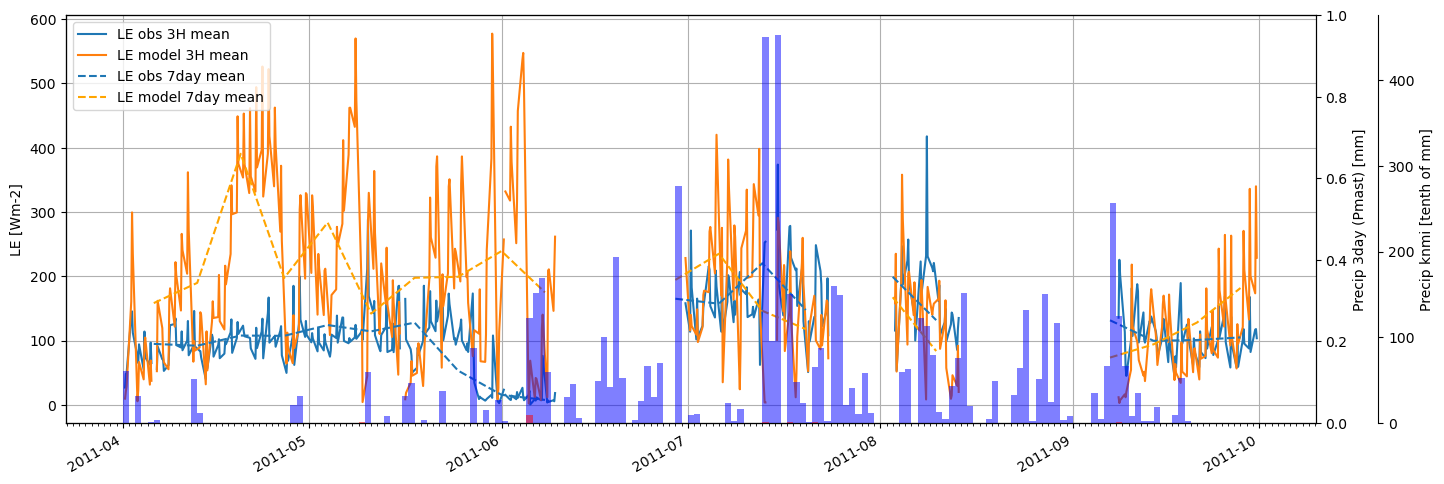

In [326]:
plt.rcParams["figure.figsize"] = (20,6)
st="2011-04-01"
ed="2011-09-30"
#df_tmp.loc[st:ed,'LE/ET'].plot()

fig,ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the twin axis below the host
#fig.subplots_adjust(bottom=0.2)
twin2.spines["right"].set_position(("axes", 1.05))
twin1.set_ylabel("Precip 3day (Pmast) [mm]")
twin2.set_ylabel("Precip knmi [tenth of mm]")

p1, = ax.plot(df_tmp3h.loc[st:ed,'LE'],label="LE obs 3H mean")
p2, = ax.plot(df_tmp3h.loc[st:ed,'ET'],label="LE model 3H mean")
p3, = ax.plot(df_tmp7d.loc[st:ed,'LE'],c='#1f77b4',linestyle='--',label="LE obs 7day mean")
p4, = ax.plot(df_tmp7d.loc[st:ed,'ET'],c='orange',linestyle='--',label="LE model 7day mean")
#p5, = twin1.plot(df_ET.loc[st:ed,'P(mast)'],c='red',label="Pmast")
#p6, = twin1.plot(df_ET.loc[st:ed,'last3day_prec'],c='black',label="Pmast 72h")
p7 = twin2.bar(knmi_regen.loc[st:ed].index,knmi_regen.loc[st:ed,'RD'],width=1, align='edge', color="blue",alpha=0.5, label="KNMI Precip")[0]
p8 = twin2.bar(df_tmp1d.loc[st:ed].index,df_tmp1d.loc[st:ed,'P(mast)sum'],width=1, align='edge', color="red",alpha=0.5, label="Pmast Precip")[0]

ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.set_ylabel('LE [Wm-2]')
ax.legend(handles=[p1,p2,p3,p4,p5,p6],labels=["a","b","c","d","e","f"])
ax.legend(loc=("upper left"))
fig.autofmt_xdate()
ax.grid()

#df_tmp30.loc[st:ed,'LE'].plot(label="LE obs 3H mean",legend="y",ylabel="Wm-2",title="LEobs and LEsim 3H mean and 7day mean values, 00:00-23:30")
#df_tmp30.loc[st:ed,'ET'].plot(label="LE model 3H mean",legend="y")
#df_tmp.loc[st:ed,'LE'].plot(label="LE obs 7day mean",legend="y",c='#1f77b4',style='--')
#df_tmp.loc[st:ed,'ET'].plot(label="LE model 7day mean",legend="y",c='orange',style='--')
#df_ET.loc[st:ed,'P(mast)'].plot()

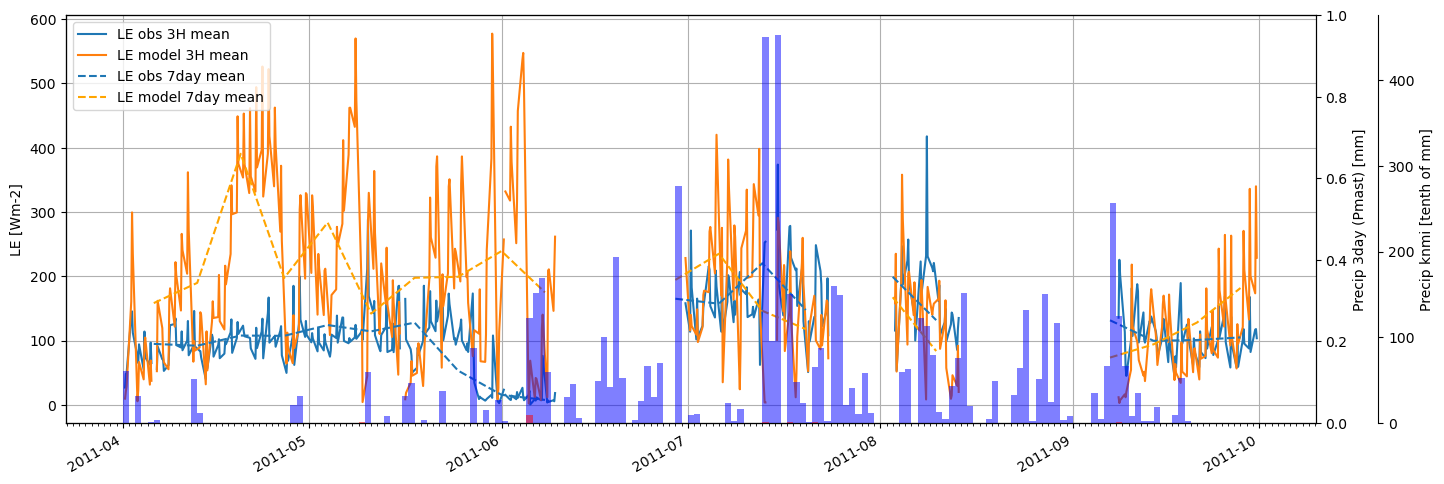

In [326]:
plt.rcParams["figure.figsize"] = (20,6)
st="2011-04-01"
ed="2011-09-30"
#df_tmp.loc[st:ed,'LE/ET'].plot()

fig,ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the twin axis below the host
#fig.subplots_adjust(bottom=0.2)
twin2.spines["right"].set_position(("axes", 1.05))
twin1.set_ylabel("Precip 3day (Pmast) [mm]")
twin2.set_ylabel("Precip knmi [tenth of mm]")

p1, = ax.plot(df_tmp3h.loc[st:ed,'LE'],label="LE obs 3H mean")
p2, = ax.plot(df_tmp3h.loc[st:ed,'ET'],label="LE model 3H mean")
p3, = ax.plot(df_tmp7d.loc[st:ed,'LE'],c='#1f77b4',linestyle='--',label="LE obs 7day mean")
p4, = ax.plot(df_tmp7d.loc[st:ed,'ET'],c='orange',linestyle='--',label="LE model 7day mean")
#p5, = twin1.plot(df_ET.loc[st:ed,'P(mast)'],c='red',label="Pmast")
#p6, = twin1.plot(df_ET.loc[st:ed,'last3day_prec'],c='black',label="Pmast 72h")
p7 = twin2.bar(knmi_regen.loc[st:ed].index,knmi_regen.loc[st:ed,'RD'],width=1, align='edge', color="blue",alpha=0.5, label="KNMI Precip")[0]
p8 = twin2.bar(df_tmp1d.loc[st:ed].index,df_tmp1d.loc[st:ed,'P(mast)sum'],width=1, align='edge', color="red",alpha=0.5, label="Pmast Precip")[0]

ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.set_ylabel('LE [Wm-2]')
ax.legend(handles=[p1,p2,p3,p4,p5,p6],labels=["a","b","c","d","e","f"])
ax.legend(loc=("upper left"))
fig.autofmt_xdate()
ax.grid()

#df_tmp30.loc[st:ed,'LE'].plot(label="LE obs 3H mean",legend="y",ylabel="Wm-2",title="LEobs and LEsim 3H mean and 7day mean values, 00:00-23:30")
#df_tmp30.loc[st:ed,'ET'].plot(label="LE model 3H mean",legend="y")
#df_tmp.loc[st:ed,'LE'].plot(label="LE obs 7day mean",legend="y",c='#1f77b4',style='--')
#df_tmp.loc[st:ed,'ET'].plot(label="LE model 7day mean",legend="y",c='orange',style='--')
#df_ET.loc[st:ed,'P(mast)'].plot()

## putting it together to derive fstr

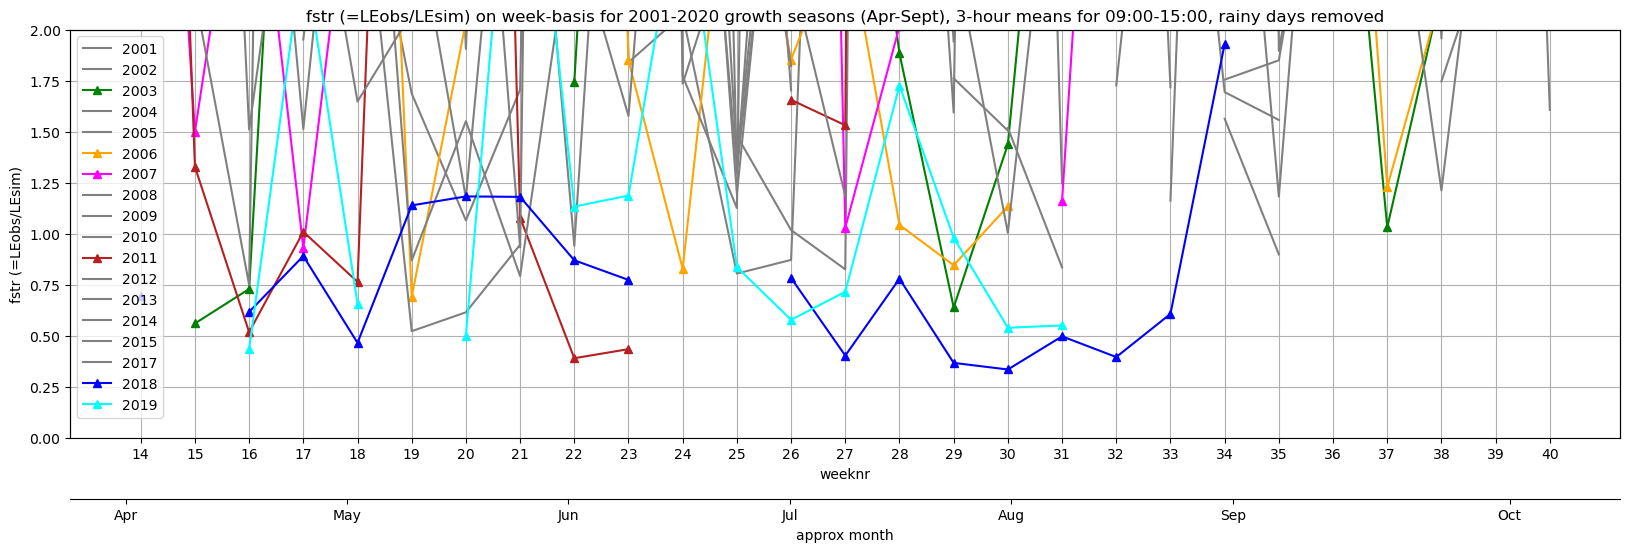

In [43]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)

#remove non-growthseason values
df_plot = df_fstr_filt_7d.copy()
df_plot=df_plot.loc[(df_plot.index.month>=4) & (df_plot.index.month<=9)]

df_plot['weeknr']=df_plot.index.isocalendar().week


fig,ax = plt.subplots()
ax.set_ylim(0,2)
ax.set_ylabel('fstr (=LEobs/LEsim)')
ax.set_xlabel('weeknr')

plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

ax2 = ax.twiny()
fig.subplots_adjust(bottom=0.2)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

ax2.set_xlabel('approx month')
ax2.set_xlim(13,41)
ax2.set_xticks([14, 18, 22, 26,  30, 34, 39])
ax2.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

colored_years={'2003':'green','2006':'orange','2007':'magenta','2011':'#b62020','2018':'blue','2019':'cyan'}

for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018','2019']:
    start=year+'-01-01 01:00'
    end=year+'-12-23 23:00'
    if year in colored_years.keys():
        color=colored_years[year]
        marker='^'
    else:
        color='grey'
        marker=''
    #marker={'2008':'^','2009':'^','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #colors={'2008':'#b62020','2009':'#cb2424','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #df_tmp.loc[start:end,'ET/LE'].plot(x=df_tmp.loc[start:end,'weeknr'],ylim=(0,15))
    ax.plot(df_plot.loc[start:end,'weeknr'],df_plot.loc[start:end,'LE/ET'], marker=marker,color=color ,label=year) #marker=marker[year]
ax.legend(loc=("upper left"))
ax.set_title('fstr (=LEobs/LEsim) on week-basis for 2001-2020 growth seasons (Apr-Sept), 3-hour means for 09:00-15:00, rainy days removed')
#ax.set_title('fstr=0: witing point , fstr=1: no water stress')
ax.grid()

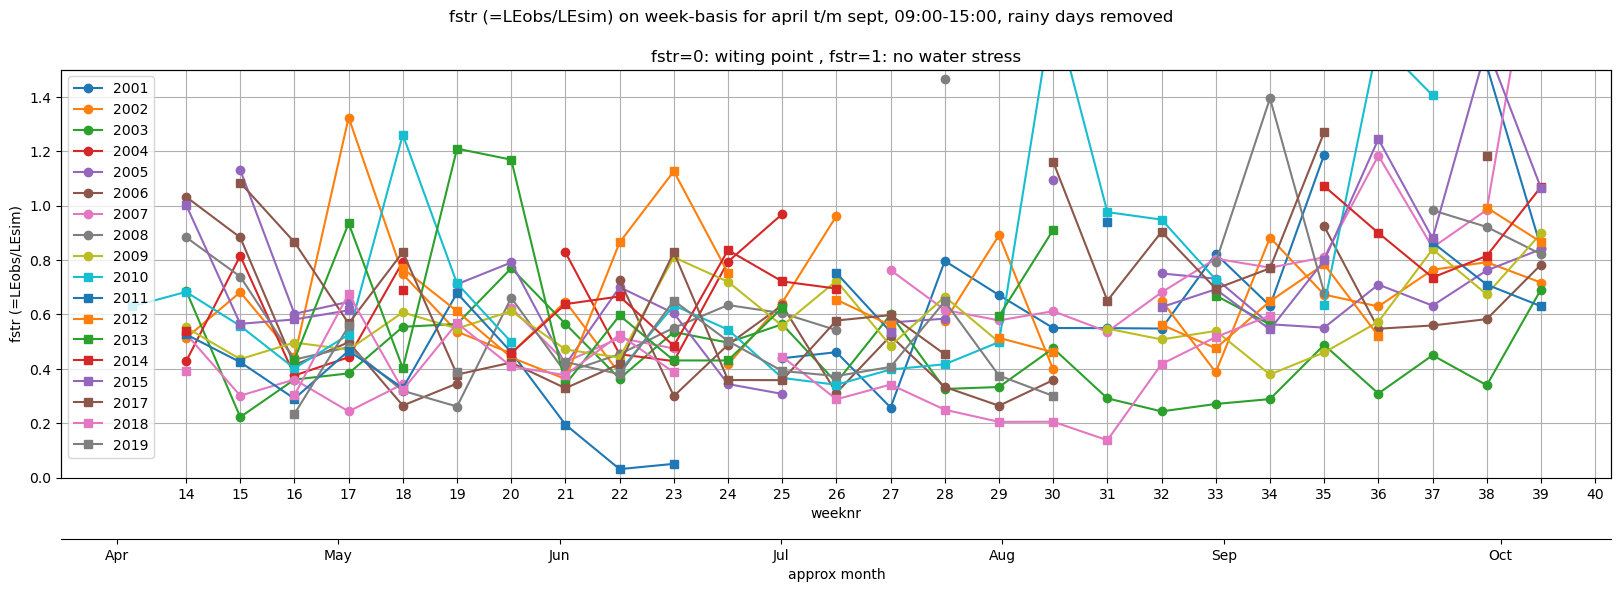

In [15]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)

#remove non-growthseason values
df_tmp7d=df_tmp7d.loc[(df_tmp7d.index.month>=4) & (df_tmp7d.index.month<=9)]

df_tmp7d['weeknr']=df_tmp7d.index.isocalendar().week

#df_tmp7d=df_tmp7d.loc[df_tmp7d['LE/ET']<=1.0]

#df_tmp

#df_tmp['ET/LE'].plot(ylim=(0,15))

fig,ax = plt.subplots()
ax.set_ylim(0,1.5)
ax.set_ylabel('fstr (=LEobs/LEsim)')
ax.set_xlabel('weeknr')

plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

ax2 = ax.twiny()
fig.subplots_adjust(bottom=0.2)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

ax2.set_xlabel('approx month')
ax2.set_xlim(13,41)
ax2.set_xticks([14, 18, 22, 26,  30, 34, 39])
ax2.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])


for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018','2019']:
    start=year+'-01-01 01:00'
    end=year+'-12-23 23:00'
    if int(year)>=2010:
        marker='s'
    else:
        marker='o'

    ax.plot(df_tmp7d.loc[start:end,'weeknr'],df_tmp7d.loc[start:end,'LE/ET'], marker=marker ,label=year) #marker=marker[year]
ax.legend(loc=("upper left"))
fig.suptitle('fstr (=LEobs/LEsim) on week-basis for april t/m sept, 09:00-15:00, rainy days removed')
ax.set_title('fstr=0: witing point , fstr=1: no water stress')
ax.grid()

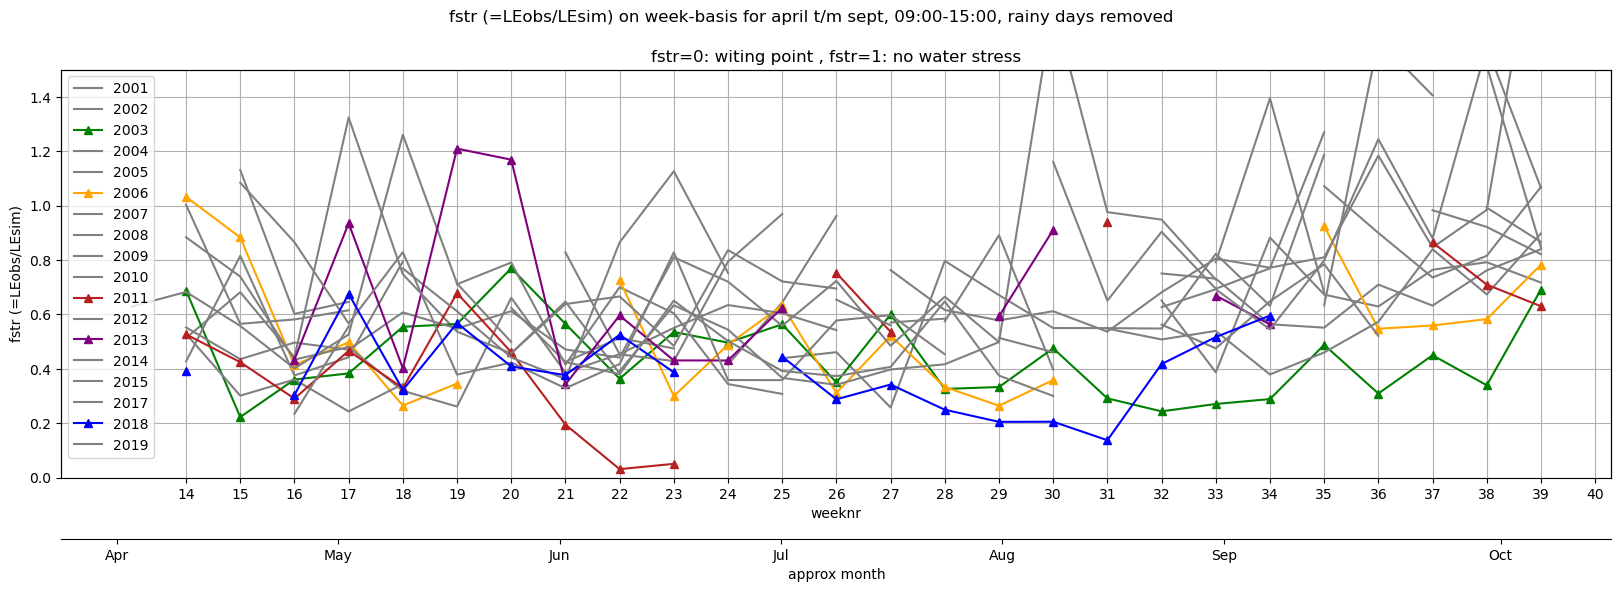

In [16]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)

#remove non-growthseason values
df_tmp7d=df_tmp7d.loc[(df_tmp7d.index.month>=4) & (df_tmp7d.index.month<=9)]

df_tmp7d['weeknr']=df_tmp7d.index.isocalendar().week

#df_tmp7d=df_tmp7d.loc[df_tmp7d['LE/ET']<=1.0]

#df_tmp

#df_tmp['ET/LE'].plot(ylim=(0,15))

fig,ax = plt.subplots()
ax.set_ylim(0,1.5)
ax.set_ylabel('fstr (=LEobs/LEsim)')
ax.set_xlabel('weeknr')

plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

ax2 = ax.twiny()
fig.subplots_adjust(bottom=0.2)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

ax2.set_xlabel('approx month')
ax2.set_xlim(13,41)
ax2.set_xticks([14, 18, 22, 26,  30, 34, 39])
ax2.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

colored_years={'2003':'green','2006':'orange','2011':'#b62020','2013':'purple','2018':'blue'}

for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018','2019']:
    start=year+'-01-01 01:00'
    end=year+'-12-23 23:00'
    if year in colored_years.keys():
        color=colored_years[year]
        marker='^'
    else:
        color='grey'
        marker=''
    #marker={'2008':'^','2009':'^','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #colors={'2008':'#b62020','2009':'#cb2424','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #df_tmp.loc[start:end,'ET/LE'].plot(x=df_tmp.loc[start:end,'weeknr'],ylim=(0,15))
    ax.plot(df_tmp7d.loc[start:end,'weeknr'],df_tmp7d.loc[start:end,'LE/ET'], marker=marker,color=color ,label=year) #marker=marker[year]
ax.legend(loc=("upper left"))
fig.suptitle('fstr (=LEobs/LEsim) on week-basis for april t/m sept, 09:00-15:00, rainy days removed')
ax.set_title('fstr=0: witing point , fstr=1: no water stress')
ax.grid()